<a href="https://colab.research.google.com/github/karnavenkatraj/Case-Study/blob/main/Guardians_Data_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# data manipulation libraries for Python
import pandas as pd
import numpy as np
from datetime import datetime

# data visualisation libraires for Python
import matplotlib.pyplot as plt
import seaborn as sns

# statistical libraries for Python
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# prediction libraries for Python (Train/Test + Tree)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
    roc_auc_score,
    roc_curve,
) 
# disable display column & row limits
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 250)


In [2]:
# read csv from google drive
from google.colab import drive
drive.mount('/content/drive')
# importing the data set from google drive
df = pd.read_csv('/content/drive/MyDrive/Python Projects/foodandbev.csv') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **2.b.i This section will assess the data cleanliness of the dataframe provided.**

In [3]:
# copying data to another variable to avoid any changes to original data
df_foodandbev = df.copy()

In [4]:
# view the first 5 rows of dataset
df_foodandbev.head()

,EventID,Start,Season,GameNumber,OpponentAbbr,OpponentName,ConcessionsInParkAttendance,SaleID,SaleDate,SaleTime,IsAdvanceSale,SaleItemID,UnitPrice,UnitQuantity,TaxInclusive,NetSales,Discount,GrossRevenue,RegisterDescription,LocationDescription,LocationType,ItemID,ItemDescription,ItemGroupDescription,Area,AreaGroupID,AreaGroup,CustID
0,9636,10:00.0,RS,29,BOS,Boston Red Sox,24910,23502764,6/24/2022 20:45,20:45:42,NaN,122548141,4.5,2,0,9.0,0,9.0,C149F Ballpark Classic Grill (Mobile),C149F Ballpark Classic Grill (Mobile),Concessions,144856,Classic Dog - Mobile,Food Sales,Field Box(1st base),3,Lower Level,1901720.0
1,9636,10:00.0,RS,29,BOS,Boston Red Sox,24910,23490622,6/24/2022 18:55,18:55:41,NaN,122538536,9.5,3,0,28.5,0,28.5,C138F Miller Bar (Mobile),C138F Miller Bar (Mobile),Concessions,144366,Miller Lite 16oz,Beer Sales,Field Box(1st base),3,Lower Level,859902.0
2,9636,10:00.0,RS,29,BOS,Boston Red Sox,24910,23506231,6/24/2022 21:09,21:09:30,NaN,122566921,12.5,2,0,25.0,0,25.0,C164F Great Lakes Bar (Mobile),C164F Great Lakes Bar (Mobile),Concessions,144832,Large Craft Draft - Mobile GL164,Beer Sales,Field Box(3rd base),3,Lower Level,944961.0
3,9636,10:00.0,RS,29,BOS,Boston Red Sox,24910,23503190,6/24/2022 21:08,21:08:10,NaN,122558468,11.5,1,0,11.5,0,11.5,CP171F Hometown Sausages (Mobile),CP171F Hometown Sausages (Mobile),Concessions,144501,Platform Sun Surfer 16oz,Beer Sales,Lower Box(3rd base),3,Lower Level,1155086.0
4,9636,10:00.0,RS,29,BOS,Boston Red Sox,24910,23501645,6/24/2022 20:29,20:29:39,NaN,122551734,11.5,1,0,11.5,0,11.5,CP171F Hometown Sausages (Mobile),CP171F Hometown Sausages (Mobile),Concessions,144501,Platform Sun Surfer 16oz,Beer Sales,Lower Box(3rd base),3,Lower Level,1155086.0


Note: In the dataframe, I have converted the SaleDate format and isolated SaleTime. This will allow further time series analysis.

In [5]:
# Random sample of the data
np.random.seed(1)
df_foodandbev.sample(n=10)

,EventID,Start,Season,GameNumber,OpponentAbbr,OpponentName,ConcessionsInParkAttendance,SaleID,SaleDate,SaleTime,IsAdvanceSale,SaleItemID,UnitPrice,UnitQuantity,TaxInclusive,NetSales,Discount,GrossRevenue,RegisterDescription,LocationDescription,LocationType,ItemID,ItemDescription,ItemGroupDescription,Area,AreaGroupID,AreaGroup,CustID
33924,9636,10:00.0,RS,29,BOS,Boston Red Sox,24910,23507086,6/24/2022 19:51,19:51:56,NaN,122552264,12.00,1,0,12.00,0,12.00,Elo-PP3-15_K193004570,The Club Lounge Bar Main,Club Lounge,144451,Premium Mixed Drink,Liquor Sales,Club Seating,2,Club Seating,NaN
16297,9636,10:00.0,RS,29,BOS,Boston Red Sox,24910,23507352,6/24/2022 21:05,21:05:11,NaN,122548756,13.50,2,0,27.00,0,27.00,Elo-PP3-15_K193004816,CP307F Grab N Go,Concessions,145195,Miller Lite 24oz,Beer Sales,Mezzanine Seating,4,Mezzanine,NaN
38055,9636,10:00.0,RS,29,BOS,Boston Red Sox,24910,23510008,6/24/2022 20:07,20:07:06,NaN,122568391,6.00,1,0,6.00,0,6.00,Elo-PP3-15_K193004498,CP167F Grab & Go,Concessions,144379,Pepsi,Non-Alcoholic Sales,Lower Box(3rd base),3,Lower Level,NaN
5186,9636,10:00.0,RS,29,BOS,Boston Red Sox,24910,23507271,6/24/2022 20:30,20:30:02,NaN,122567417,9.50,1,0,9.50,0,9.50,Elo-PP3-15_K193004662,CP180C Miller Lite Grill,Concessions,144366,Miller Lite 16 oz,Beer Sales,Bleachers,1,Bleachers,NaN
37296,9636,10:00.0,RS,29,BOS,Boston Red Sox,24910,23486373,6/24/2022 18:38,18:38:31,NaN,122527402,15.00,1,0,15.00,0,15.00,Elo-PP3-15_K193004444,CP121F Grab N Go,Concessions,145193,Vizzy Pineapple Mango 24oz,Beer Sales,Lower Box(1st base),3,Lower Level,NaN
26143,9636,10:00.0,RS,29,BOS,Boston Red Sox,24910,23501444,6/24/2022 20:25,20:25:36,NaN,122560906,7.50,1,0,7.50,0,7.50,Elo-PP3-15_K193004870,C149F Ballpark Classic Grill,Concessions,144403,Bratwurst,Food Sales,Field Box(1st base),3,Lower Level,NaN
46798,9636,10:00.0,RS,29,BOS,Boston Red Sox,24910,23483138,6/24/2022 18:17,18:17:35,NaN,122525491,4.75,1,0,4.75,0,4.75,Elo-PP3-15_I183019016,C570 S58 Ballpark Classics,Concessions,144375,Bottled Water,Non-Alcoholic Sales,Upper Reserve(3rd base),7,Upper Level,NaN
47191,9636,10:00.0,RS,29,BOS,Boston Red Sox,24910,23507248,6/24/2022 20:17,20:17:46,NaN,122553592,15.00,1,0,15.00,0,15.00,Elo-PP3-15_K193004869,C572C S59 Beverage Express,Concessions,145194,Topochico 24oz,Beer Sales,Upper Reserve(3rd base),7,Upper Level,NaN
931,9636,10:00.0,RS,29,BOS,Boston Red Sox,24910,23487264,6/24/2022 18:20,18:20:26,NaN,122528000,1.00,3,0,3.00,0,3.00,Elo-PP3-15_K193004599,CP564F Sausages & Dogs,Concessions,144406,$1 Dog,Food Sales,View Box(3rd base),7,Upper Level,NaN
47146,9636,10:00.0,RS,29,BOS,Boston Red Sox,24910,23502446,6/24/2022 21:13,21:13:32,NaN,122565617,6.00,1,0,6.00,0,6.00,Elo-PP3-15_K193004876,CP114C Rally Burger,Concessions,144489,Double Cheeseburger,Food Sales,Lower Reserve(Outfield),3,Lower Level,NaN


In [6]:
# Convert the SaleTime column to datetime
df_foodandbev['SaleTime'] = pd.to_datetime(df_foodandbev['SaleTime'], format='%H:%M:%S')

# Verify the conversion
print(df_foodandbev.dtypes)

EventID                                 int64
Start                                  object
Season                                 object
GameNumber                              int64
OpponentAbbr                           object
OpponentName                           object
ConcessionsInParkAttendance             int64
SaleID                                  int64
SaleDate                               object
SaleTime                       datetime64[ns]
IsAdvanceSale                         float64
SaleItemID                              int64
UnitPrice                             float64
UnitQuantity                            int64
TaxInclusive                            int64
NetSales                              float64
Discount                                int64
GrossRevenue                          float64
RegisterDescription                    object
LocationDescription                    object
LocationType                           object
ItemID                            

**The first step to assess data cleanliness is to check for duplicates.**

In [7]:
# check for duplicate values
df_foodandbev[df_foodandbev.duplicated()].count()

EventID                        0
Start                          0
Season                         0
GameNumber                     0
OpponentAbbr                   0
OpponentName                   0
ConcessionsInParkAttendance    0
SaleID                         0
SaleDate                       0
SaleTime                       0
IsAdvanceSale                  0
SaleItemID                     0
UnitPrice                      0
UnitQuantity                   0
TaxInclusive                   0
NetSales                       0
Discount                       0
GrossRevenue                   0
RegisterDescription            0
LocationDescription            0
LocationType                   0
ItemID                         0
ItemDescription                0
ItemGroupDescription           0
Area                           0
AreaGroupID                    0
AreaGroup                      0
CustID                         0
dtype: int64

**Observations:** We have no duplicates, which is a good sign for data cleanliness. This means we are not double-counting any customer purchases that must be addressed.

**The second step would be to check for null values**

In [8]:
df_foodandbev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47985 entries, 0 to 47984
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   EventID                      47985 non-null  int64         
 1   Start                        47985 non-null  object        
 2   Season                       47985 non-null  object        
 3   GameNumber                   47985 non-null  int64         
 4   OpponentAbbr                 47985 non-null  object        
 5   OpponentName                 47985 non-null  object        
 6   ConcessionsInParkAttendance  47985 non-null  int64         
 7   SaleID                       47985 non-null  int64         
 8   SaleDate                     47985 non-null  object        
 9   SaleTime                     47985 non-null  datetime64[ns]
 10  IsAdvanceSale                0 non-null      float64       
 11  SaleItemID                   47985 non-nu

**Observations:** CustID has 248 non-null values. This means we are missing customer ID tagging for a majority of the customer purchasing in the data frame. Since we got this data from a SQL query (see cell A1 in Excel), this could be an issue with the query or the native database.

In [9]:
# Filter the data to include only non-null CustID rows
df_notnull = df_foodandbev[df_foodandbev.CustID.notnull()]

# Drop the duplicate rows based on all the columns
df_notnull.drop_duplicates(inplace=True)

# Get a list of the non-null CustID values
notnull_custid_values = list(df_notnull.CustID)

# Filter the data to include only the rows with NULL values in the CustID column
df_null = df[df.CustID.isnull()]

# Check if any of the rows with NULL values in the CustID column are duplicates
if df_notnull[df_notnull.CustID.isin(notnull_custid_values)].drop("CustID", axis=1).isin(df_null.drop("CustID", axis=1)).any().any():
    print("There are duplicates.")
else:
    print("There are no duplicates.")


There are no duplicates.


/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [10]:
# Create a new dataframe where CustID is null
null_custid_counts = df_foodandbev[df_foodandbev['CustID'].isnull()]
print(null_custid_counts['ItemDescription'].value_counts().head(20))
print(null_custid_counts['ItemGroupDescription'].value_counts().head(20))

$1 Dog                            5429
Bottled Water                     5154
Large Craft Draft                 2545
Leinenkugel Summer Shandy 16oz    2253
Peanuts                           1875
Miller Lite 24oz                  1741
Large Soda                        1426
Miller Lite 16oz                  1221
Miller Lite 16 oz                 1216
Pepsi                             1212
Soft Pretzel                       929
Coors Light 24oz                   917
White Claw Black Cherry 16oz       913
Large Domestic Draft               878
Miller Lite $2 12 oz               684
Medium Soda                        637
Diet Pepsi                         605
Jumbo Hot Dog                      596
Coors Light 16 oz                  546
Vizzy Pineapple Mango 24oz         518
Name: ItemDescription, dtype: int64
Food Sales             18782
Beer Sales             17432
Non-Alcoholic Sales    10152
Liquor Sales            1154
Wine Sales               217
Name: ItemGroupDescription, dtype: int6

**Observations:** This code checks that the null values enteries are not duplicates with the non-null Cust_ID rows. Once again, we want to make sure that the data is not double counting certain customer purchases.  We do this buy creating two seperate data frames and then using a conditional to compare the two dataframe enteries.

**The third step would be to double check for inconsistent data**

In [11]:
# Get the data type of each column
column_dtypes = df_foodandbev.dtypes

# Check if any column has inconsistent data type
for column_name, dtype in column_dtypes.iteritems():
    if df_foodandbev[column_name].apply(type).nunique() > 1:
        print("Column '{}' has non-uniform data types".format(column_name))


**Observations:** The data has no inconsistent data types. The columns are uniform. Essentially, there are no surprises in that there are no strings in a column thats has only integers, etc.

**The final step would be an outlier check.**

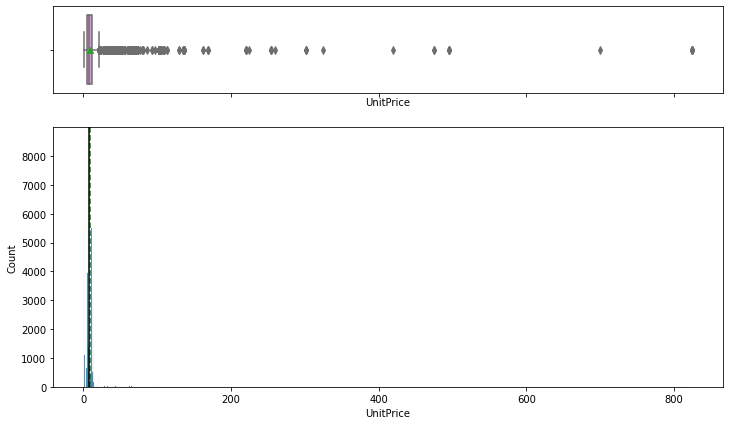

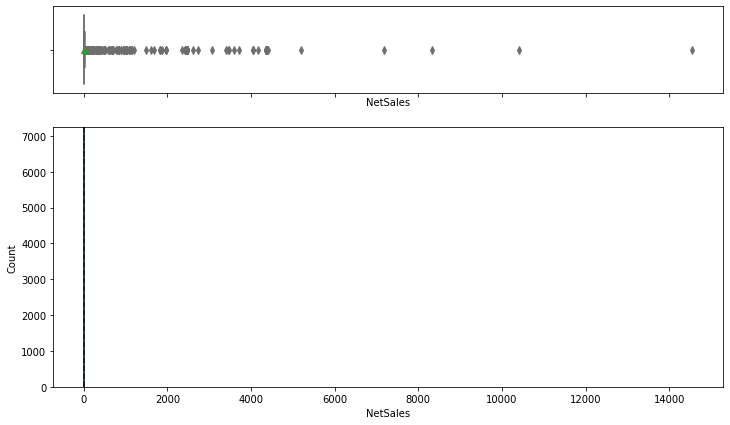

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

#Net sales and unit price outlier check
for feature in ["UnitPrice", "NetSales"]:
    histogram_boxplot(data=df_foodandbev, feature=feature)
    plt.show()


**Observations:** We have a lot of outliers for Net Sales and Unit Price. I will investigate this a bit further, and see what items are driving the price and the sale up.

In [13]:
def get_outliers(data, feature):
    """
    Extract outliers of a feature in a separate data frame
    
    data: dataframe
    feature: dataframe column
    """
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    return outliers

outliers_netsales = get_outliers(df_foodandbev, "NetSales")
print(outliers_netsales)

       EventID    Start Season  GameNumber OpponentAbbr    OpponentName  \
1         9636  10:00.0     RS          29          BOS  Boston Red Sox   
2         9636  10:00.0     RS          29          BOS  Boston Red Sox   
9         9636  10:00.0     RS          29          BOS  Boston Red Sox   
18        9636  10:00.0     RS          29          BOS  Boston Red Sox   
37        9636  10:00.0     RS          29          BOS  Boston Red Sox   
...        ...      ...    ...         ...          ...             ...   
47925     9636  10:00.0     RS          29          BOS  Boston Red Sox   
47931     9636  10:00.0     RS          29          BOS  Boston Red Sox   
47943     9636  10:00.0     RS          29          BOS  Boston Red Sox   
47977     9636  10:00.0     RS          29          BOS  Boston Red Sox   
47984     9636  10:00.0     RS          29          BOS  Boston Red Sox   

       ConcessionsInParkAttendance    SaleID         SaleDate  \
1                            24910

I am going to look into Item Description, Location Type, Location Description and Area to get a better idea of where our outliers are coming from. I will also evaluate the quantity that is flowing into net sales outliers.

In [14]:
#Item Breakdown of outliers
item_descriptions = outliers_netsales['ItemDescription'].value_counts()
most_common_item_descriptions = item_descriptions.head(n=20)
print(most_common_item_descriptions)


Large Craft Draft                 1058
Miller Lite 24oz                   588
Coors Light 24oz                   282
Double Cocktail                    112
Topochico 24oz                      97
Vizzy Pineapple Mango 24oz          76
Leinenkugel Summer Shandy 16oz      74
Miller Lite 16 oz                   71
Miller Lite 16oz                    70
Large Domestic Draft                69
Nachos Gigante - Momocho            50
OCB Chicken Bowl                    43
Weekend Buffet                      39
All-American Burger w/fries         35
Aquafina                            35
Jumbo Hot Dog                       35
Chicken Tenders                     34
Loaded Nachos - Beef                34
White Claw Black Cherry 16oz        29
DD Medium                           27
Name: ItemDescription, dtype: int64


**Observations:** These are the most common item descriptions in the outliers. Miller Lite 16oz has been named inconsistently here. We will next investigate the LocationType of the outliers. 

In [15]:
#Location Type of outliers
location_type = outliers_netsales['LocationType'].value_counts()
most_common_location_type = location_type.head(n=20)
print(most_common_location_type)


Concessions     3199
Suites           639
Club Lounge      103
Restaurants       68
Premium Club       7
Name: LocationType, dtype: int64


**Observations:** The most common location types are Concessions, Suites and Club Lounges. Concessions make up the lion share of the location type of the outlier purchases.

In [16]:
#Location description of outliers
location_description = outliers_netsales['LocationDescription'].value_counts()
most_common_location_description = location_description.head(n=20)
print(most_common_location_description)

Suites                                639
C164F Great Lakes Bar                 211
C116B Bar 1                           164
C153B HPC Bar                         139
CP158C Fat Heads                      117
CP107C Great Lakes                    100
CP160C Brew Kettle                     99
CP118F Butcher & Brewer Draft Beer     94
C117B Bar 2                            92
CP121F Grab N Go                       91
CP116F Fat Heads Draft Beer            85
C138F Miller Bar                       78
CP181C Grab N Go                       77
CP576F Satellite Beer                  76
CP133C Market Garden                   75
The Club Lounge Bar Main               69
Terrace Club                           68
CP162F Grab & Go                       67
CP167F Grab & Go                       66
C572C S59 Beverage Express             60
Name: LocationDescription, dtype: int64


**Observations:** The most common location descriptions are Suites, the Great Lakes Bar and Bar 1.

In [17]:
areas = outliers_netsales['Area'].value_counts()
most_common_areas = areas.head(n=20)
print(most_common_areas)

Field Box(3rd base)        749
Suites                     639
Lower Reserve(Outfield)    601
Field Box(1st base)        465
Lower Box(1st base)        450
Lower Box(3rd base)        222
Upper Reserve(3rd base)    193
View Box(1st base)         151
Bleachers                  116
Upper Reserve(1st base)    116
Club Seating               103
View Box(3rd base)         100
Terrace Club Dining         68
Mezzanine Seating           36
Premium Club                 7
Name: Area, dtype: int64


**Observations:** Most the outliers come from the higher ticket priced area. This leads us to ask for the ticket price each customer paid so we get a better idea of how that might effect customer behavior.

In [18]:
registerdescription = outliers_netsales['RegisterDescription'].value_counts()
most_common_registerdescription = registerdescription.head(n=20)
print(most_common_registerdescription)

SSCLVBBSUITESO1          206
SSCLVBBSUITESO2          173
SSCLVBBSUITESP3          100
Elo-PP3-15_K193004579     85
Elo-PP3-15_I183019023     77
Elo-PP3-15_I183019446     75
Elo-PP3-15_K193004639     73
SSCLVBBSUITESP1           72
Elo-PP3-15_K193004823     67
Elo-PP3-15_I183019443     63
SSCLVBBSUITESP2           61
Elo-PP3-15_K193004537     59
Elo-PP3-15_K193004465     58
Elo-PP3-15_K193004822     58
Elo-PP3-15_K193004801     56
Elo-PP3-15_K193004515     54
Elo-PP3-15_K193004552     52
Elo-PP3-15_K193004522     49
Elo-PP3-15_K193004497     48
Elo-PP3-15_K193004772     48
Name: RegisterDescription, dtype: int64


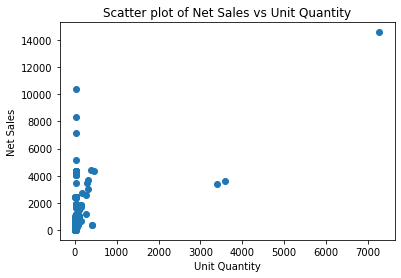

In [19]:
plt.scatter(outliers_netsales["UnitQuantity"], outliers_netsales["NetSales"])
plt.xlabel("Unit Quantity")
plt.ylabel("Net Sales")
plt.title("Scatter plot of Net Sales vs Unit Quantity")
plt.show()


In [20]:
grouped = outliers_netsales.groupby(['ItemDescription', 'Area', 'LocationType', 'ItemGroupDescription']).size().reset_index(name='counts')
most_common = grouped.sort_values(by='counts', ascending=False).head(20)
print(most_common)


              ItemDescription                     Area LocationType  \
209         Large Craft Draft      Field Box(3rd base)  Concessions   
211         Large Craft Draft  Lower Reserve(Outfield)  Concessions   
210         Large Craft Draft      Lower Box(1st base)  Concessions   
296          Miller Lite 24oz  Upper Reserve(3rd base)  Concessions   
290          Miller Lite 24oz      Field Box(3rd base)  Concessions   
208         Large Craft Draft      Field Box(1st base)  Concessions   
289          Miller Lite 24oz      Field Box(1st base)  Concessions   
207         Large Craft Draft             Club Seating  Club Lounge   
121          Double Cocktail   Lower Reserve(Outfield)  Concessions   
291          Miller Lite 24oz      Lower Box(1st base)  Concessions   
295          Miller Lite 24oz  Upper Reserve(1st base)  Concessions   
311  Nachos Gigante - Momocho      Field Box(1st base)  Concessions   
92           Coors Light 24oz      Field Box(1st base)  Concessions   
99    

**Observations:** Most the common cross-cut outliers are beer sales in higher ticket areas.

In [21]:
outliers_custid_null = outliers_netsales[outliers_netsales["CustID"].isnull()]
count_null_outliers = outliers_custid_null.shape[0]
count_all_outliers = outliers_netsales.shape[0]
print("Number of outliers where CustID is null:", count_null_outliers)
print("Number of all outliers :", count_all_outliers)

Number of outliers where CustID is null: 4003
Number of all outliers : 4016


**Observations:** All of the outliers coincide with CustIDs being null values

Note: I deep dived into the outliers to learn more about them, I will go ahead eliminate the outliers for Net Sales for a number of reasons. 
1.   It makes up less than 10% of the data.
2.   It could muddle the analysis of high performing products by customers

**Lets take a look at the new dataframe**


In [22]:
#Create a new dataframe that eliminated outliers
Q1 = df_foodandbev['NetSales'].quantile(0.25)
Q3 = df_foodandbev['NetSales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_foodandbev_nooutliers = df_foodandbev[(df_foodandbev['NetSales'] > lower_bound) & (df_foodandbev['NetSales'] < upper_bound)]


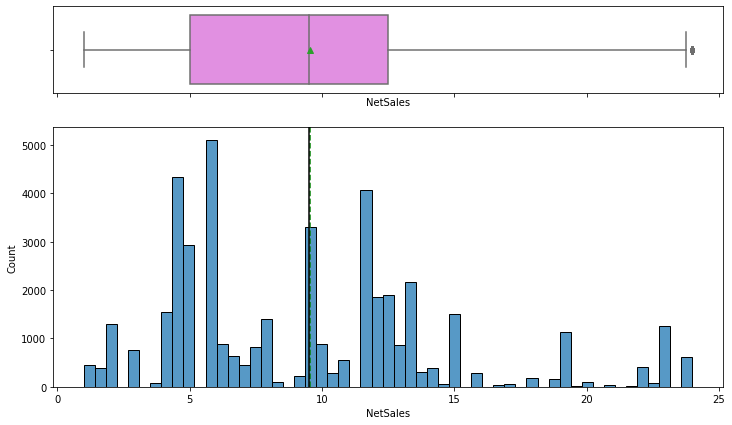

In [23]:
histogram_boxplot(df_foodandbev_nooutliers, "NetSales")

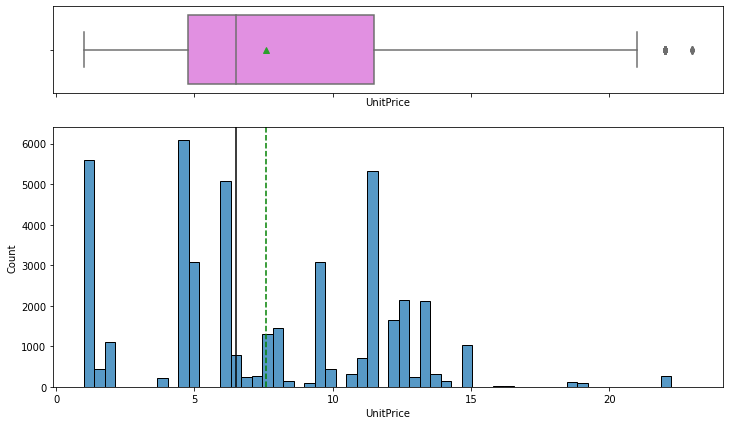

In [24]:
histogram_boxplot(df_foodandbev_nooutliers, "UnitPrice")

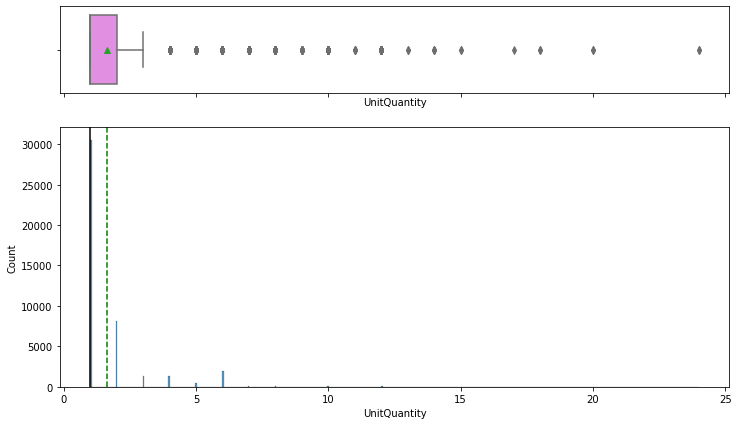

In [25]:
histogram_boxplot(df_foodandbev_nooutliers, "UnitQuantity")

In [26]:
df_foodandbev_nooutliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43969 entries, 0 to 47983
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   EventID                      43969 non-null  int64         
 1   Start                        43969 non-null  object        
 2   Season                       43969 non-null  object        
 3   GameNumber                   43969 non-null  int64         
 4   OpponentAbbr                 43969 non-null  object        
 5   OpponentName                 43969 non-null  object        
 6   ConcessionsInParkAttendance  43969 non-null  int64         
 7   SaleID                       43969 non-null  int64         
 8   SaleDate                     43969 non-null  object        
 9   SaleTime                     43969 non-null  datetime64[ns]
 10  IsAdvanceSale                0 non-null      float64       
 11  SaleItemID                   43969 non-nu

In [27]:
df_foodandbev_nooutliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43969 entries, 0 to 47983
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   EventID                      43969 non-null  int64         
 1   Start                        43969 non-null  object        
 2   Season                       43969 non-null  object        
 3   GameNumber                   43969 non-null  int64         
 4   OpponentAbbr                 43969 non-null  object        
 5   OpponentName                 43969 non-null  object        
 6   ConcessionsInParkAttendance  43969 non-null  int64         
 7   SaleID                       43969 non-null  int64         
 8   SaleDate                     43969 non-null  object        
 9   SaleTime                     43969 non-null  datetime64[ns]
 10  IsAdvanceSale                0 non-null      float64       
 11  SaleItemID                   43969 non-nu

## **2.b.ii This section will attempt to find the highest performing products and locations.**

The first step for finding highest performing products would be to group the data and sum net sales and unit quantity by purchase.

In [28]:
 df_fandb = df_foodandbev_nooutliers 

In [29]:
# Group the data by 'ItemDescription', 'LocationType' and 'ItemGroupDescription'
grouped_netsales = df_fandb.groupby(['ItemDescription', 'LocationType', 'ItemGroupDescription'])['NetSales'].sum().reset_index()

# Sort the grouped data by 'NetSales' in descending order
grouped_netsales.sort_values('NetSales', ascending=False, inplace=True)

# Get the top 10 products and locations
N = 15
top_products_locations_netsales = grouped_netsales.head(N)
print(top_products_locations_netsales)

                    ItemDescription LocationType ItemGroupDescription  \
26                    Bottled Water  Concessions  Non-Alcoholic Sales   
171  Leinenkugel Summer Shandy 16oz  Concessions           Beer Sales   
0                            $1 Dog  Concessions           Food Sales   
162               Large Craft Draft  Concessions           Beer Sales   
205                Miller Lite 24oz  Concessions           Beer Sales   
201               Miller Lite 16 oz  Concessions           Beer Sales   
168                      Large Soda  Concessions  Non-Alcoholic Sales   
203                Miller Lite 16oz  Concessions           Beer Sales   
166            Large Domestic Draft  Concessions           Beer Sales   
301    White Claw Black Cherry 16oz  Concessions           Beer Sales   
228                         Peanuts  Concessions           Food Sales   
230                           Pepsi  Concessions  Non-Alcoholic Sales   
72                 Coors Light 24oz  Concessions   

In [30]:
# Group the data by 'ItemDescription' and 'LocationType'
grouped_unitquant = df_fandb.groupby(['ItemDescription', 'LocationType', 'ItemGroupDescription'])['UnitQuantity'].sum().reset_index()

# Sort the grouped data by 'UnitQuantity' in descending order
grouped_unitquant.sort_values('UnitQuantity', ascending=False, inplace=True)

# Get the top 10 products and locations
N = 10
top_products_locations_unitquant = grouped_unitquant.head(N)
print(top_products_locations_unitquant)

                    ItemDescription LocationType ItemGroupDescription  \
0                            $1 Dog  Concessions           Food Sales   
26                    Bottled Water  Concessions  Non-Alcoholic Sales   
171  Leinenkugel Summer Shandy 16oz  Concessions           Beer Sales   
228                         Peanuts  Concessions           Food Sales   
197            Miller Lite $2 12 oz  Concessions           Beer Sales   
168                      Large Soda  Concessions  Non-Alcoholic Sales   
201               Miller Lite 16 oz  Concessions           Beer Sales   
203                Miller Lite 16oz  Concessions           Beer Sales   
230                           Pepsi  Concessions  Non-Alcoholic Sales   
162               Large Craft Draft  Concessions           Beer Sales   

     UnitQuantity  
0           23855  
26           7058  
171          2651  
228          2034  
197          1894  
168          1751  
201          1505  
203          1469  
230          145

**Observations:** Clearly discounted/low items cost moves more volume through the system. Some common enteries on both the net sales and unit quantity top 10 are the Leinenkugel Summer Shandy 16oz, Bottled Water, and $1 Dog. At a high level, you could say the discrepancies on the list could be a price inefficiencies especially if the analysis is common across multiple games.

In [31]:
# Finding average check by item
item_descriptions = ['Bottled Water', 'Leinenkugel Summer Shandy 16oz', '$1 Dog', 'Large Craft Draft', 'Miller Lite 24oz',
                     'Miller Lite 16 oz', 'Large Soda', 'Miller Lite 16oz', 'Large Domestic Draft', 'Miller Lite $2 12 oz', 'Large Craft Draft','Peanuts', 'Pepsi' ]

def calculate_average_check(dataframe, item_descriptions):
    avg_netsales = []
    for item in item_descriptions:
        item_avg_netsale = dataframe[dataframe['ItemDescription'] == item].groupby('ItemDescription')['NetSales'].mean().values[0]
        avg_netsales.append([item, item_avg_netsale])
    avg_netsales_df = pd.DataFrame(avg_netsales, columns=['Item', 'Avg Net Sale'])
    top_10 = avg_netsales_df.nlargest(15, 'Avg Net Sale')
    return top_10

top_10 = calculate_average_check(df_fandb, item_descriptions)
print(top_10)


                              Item  Avg Net Sale
8             Large Domestic Draft     16.390606
1   Leinenkugel Summer Shandy 16oz     14.590494
4                 Miller Lite 24oz     13.500000
5                Miller Lite 16 oz     12.779271
3                Large Craft Draft     12.500000
10               Large Craft Draft     12.500000
7                 Miller Lite 16oz     12.480553
6                       Large Soda      9.845046
12                           Pepsi      7.499169
0                    Bottled Water      6.491814
9             Miller Lite $2 12 oz      5.562408
11                         Peanuts      5.400956
2                           $1 Dog      4.398046


**Observations:** This is an average check metric for some of the top performing items from a net sales and quantity perspective. Essentially, this metric lets us know, when a customer purchases these items, what is the average amount of the net sale. The higher the average check gives us a metric that balances price and quantity.

In [32]:
# Finding average check by item purchased over 1000 times
item_descriptions_all = df_fandb['ItemDescription'].unique().tolist()


def calculate_average_check(dataframe, item_descriptions):
    avg_netsales = []
    for item in item_descriptions_all:
        item_count = dataframe[dataframe['ItemDescription'] == item].shape[0]
        if item_count > 1000:
            item_avg_netsale = dataframe[dataframe['ItemDescription'] == item].groupby('ItemDescription')['NetSales'].mean().values[0]
            avg_netsales.append([item, item_avg_netsale])
    avg_netsales_df = pd.DataFrame(avg_netsales, columns=['Item', 'Avg Net Sale'])
    top_10 = avg_netsales_df.nlargest(11, 'Avg Net Sale')
    return top_10
top_10 = calculate_average_check(df_fandb, item_descriptions)
print(top_10)


                             Item  Avg Net Sale
4  Leinenkugel Summer Shandy 16oz     14.590494
6                Miller Lite 24oz     13.500000
0               Miller Lite 16 oz     12.779271
9               Large Craft Draft     12.500000
1                Miller Lite 16oz     12.480553
3                      Large Soda      9.845046
7                           Pepsi      7.499169
2                   Bottled Water      6.491814
5                         Peanuts      5.400956
8                          $1 Dog      4.398046


**Observations:** This shows us the highest average check filtered for more than 1,000 purchases, it is nearly the same as the highest net sales and quantity sold. If we do not filter for purchases, the metric generally has less frequently purchased high ticket items like Double Cocktails, Capitan Morgan etc.

In [33]:
# Finding average check by location type
locationtypes = df_fandb['LocationType'].unique()

def calculate_average_check(dataframe, locationtypes):
    avg_netsales = []
    for item in locationtypes:
        item_avg_netsale = dataframe[dataframe['LocationType'] == item].groupby('LocationType')['NetSales'].mean().values[0]
        avg_netsales.append([item, item_avg_netsale])
    avg_netsales_df = pd.DataFrame(avg_netsales, columns=['Location Type', 'Avg Net Sale'])
    top_5 = avg_netsales_df.nlargest(5, 'Avg Net Sale')
    return top_5

top_5 = calculate_average_check(df_fandb, locationtypes)

print(top_5)


  Location Type  Avg Net Sale
4  Premium Club     16.588235
2        Suites     16.507109
1   Club Lounge     12.986347
3   Restaurants     12.222826
0   Concessions      9.400310


In [34]:
locationtypes = df_fandb['LocationType'].unique()

def calculate_net_sales_by_location_type(dataframe, locationtypes):
    avg_netsales = []
    total_netsales = dataframe['NetSales'].sum()
    for item in locationtypes:
        item_netsales = dataframe[dataframe['LocationType'] == item]['NetSales'].sum()
        avg_netsales.append([item, item_netsales])
    avg_netsales_df = pd.DataFrame(avg_netsales, columns=['Location Type', 'Net Sales'])
    avg_netsales_df['Percentage of Total Net Sales'] = avg_netsales_df['Net Sales'] / total_netsales * 100
    return avg_netsales_df

net_sales_by_location_type = calculate_net_sales_by_location_type(df_fandb, locationtypes)

print(net_sales_by_location_type)


  Location Type  Net Sales  Percentage of Total Net Sales
0   Concessions   400331.0                      95.541655
1   Club Lounge    13791.5                       3.291433
2        Suites     3483.0                       0.831241
3   Restaurants     1124.5                       0.268369
4  Premium Club      282.0                       0.067301


**Observations:** Considering location type, concessions make up a majority of the net sales but have the lowest average check meaning most of the volume going through Progressive Field is being done in these stands. This aligns with the accessability for all fans to these vendors.

In [35]:
locationdescriptions = df_fandb['LocationDescription'].value_counts().nlargest(20).index.tolist()

def calculate_average_check(dataframe, locationdescriptions):
    avg_netsales = []
    for item in locationdescriptions:
        item_avg_netsale = dataframe[dataframe['LocationDescription'] == item].groupby('LocationDescription')['NetSales'].mean().values[0]
        item_location_type = dataframe[dataframe['LocationDescription'] == item]['LocationType'].unique()[0]
        avg_netsales.append([item, item_avg_netsale, item_location_type])
    avg_netsales_df = pd.DataFrame(avg_netsales, columns=['Location Description', 'Avg Net Sale', 'Location Type'])
    top_10 = avg_netsales_df.nlargest(10, 'Avg Net Sale')
    return top_10

top_10 = calculate_average_check(df_fandb, locationdescriptions)

print(top_10)

locationdescriptions_v = df_fandb['LocationDescription'].unique()

def calculate_average_check(dataframe, locationdescriptions_v):
    avg_netsales = []
    for item in locationdescriptions_v:
        item_avg_netsale = dataframe[dataframe['LocationDescription'] == item].groupby('LocationDescription')['NetSales'].mean().values[0]
        item_location_type = dataframe[dataframe['LocationDescription'] == item]['LocationType'].unique()[0]
        avg_netsales.append([item, item_avg_netsale, item_location_type])
    avg_netsales_df = pd.DataFrame(avg_netsales, columns=['Location Description', 'Avg Net Sale', 'Location Type'])
    top_10 = avg_netsales_df.nlargest(10, 'Avg Net Sale')
    return top_10

top_10 = calculate_average_check(df_fandb, locationdescriptions_v)

print(top_10)

           Location Description  Avg Net Sale Location Type
18     The Club Lounge Bar Main     13.492447   Club Lounge
13                  C116B Bar 1     12.261232   Concessions
9              CP121F Grab N Go     12.208923   Concessions
14                  C117B Bar 2     11.912829   Concessions
19             CP150A Grab & Go     11.641975   Concessions
10             CP550F Grab N Go     10.958769   Concessions
11             CP167F Grab & Go     10.865654   Concessions
4                C139C Hop Stop     10.385675   Concessions
0              CP162F Grab & Go      9.901003   Concessions
15  C559 S57 Burgers and Fries       9.784173   Concessions
            Location Description  Avg Net Sale Location Type
71                        Suites     17.403409        Suites
105                 Premium Club     16.588235  Premium Club
107        CP120F Craft Cocktail     16.243902   Concessions
75    CP119F Domestic Draft Cart     14.547739   Concessions
81           CP158F Jim Beam Bar   

**Observations:** After filtering for the top 20 locations by volume, average net sale is highest in location types that are concessions. If we do not include, volume we get more higher ticket alcohol data from Jim Beam Bar, Suites, and HBC Bar. Moreover, we see that Grab and Go Concession stands are increasingly popular and yield a high average check. We will drill down on Grab and Go Concessions. 

Grab and Go Overview:

In [36]:
def get_metrics(dataframe):
    grab_go_locations = dataframe[dataframe['LocationDescription'].str.contains('grab|go', case=False, na=False)]
    total_volume = grab_go_locations['UnitQuantity'].sum()
    total_netsales = grab_go_locations['NetSales'].sum()
    avg_check = total_netsales / total_volume
    avg_price = total_netsales / grab_go_locations['ItemDescription'].count()
    return {'Total Volume': total_volume, 'Total Net Sales': total_netsales, 'Average Check': avg_check, 'Average Price': avg_price}

metrics = get_metrics(df_fandb)

print(metrics)


{'Total Volume': 9878, 'Total Net Sales': 72108.25, 'Average Check': 7.299883579671999, 'Average Price': 10.470197473500798}


In [37]:
def get_popular_items(dataframe, metric):
    popular_items = dataframe.groupby(['ItemDescription'])[metric].sum().reset_index()
    return popular_items.nlargest(10, metric)

grab_go_df = df_fandb[df_fandb['LocationDescription'].str.contains('grab|go', case=False, na=False)]
popular_items_netsale = get_popular_items(grab_go_df, 'NetSales')
print(popular_items_netsale)




                   ItemDescription  NetSales
30  Leinenkugel Summer Shandy 16oz   7670.50
37                Miller Lite 24oz   5346.00
48    White Claw Black Cherry 16oz   5002.50
47      Vizzy Pineapple Mango 24oz   4980.00
5                    Bottled Water   4935.25
46                  Topochico 24oz   3975.00
49           White Claw Mango 16oz   3645.50
14                Coors Light 24oz   3510.00
21    Gatorade Glacier Freeze Zero   2353.00
0                           $1 Dog   2237.00


**Observations:** These are the top 10 items by net sales that are bought at Grab and Go concession. Since the naming is inconsistent, I used a string method to return the relevant data. 

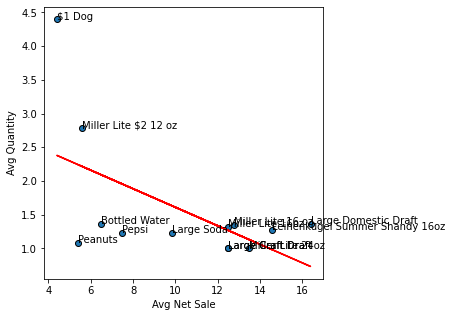

In [38]:
def calculate_average_netsale_quantity(dataframe, item_descriptions):
    avg_netsale_quantity = []
    for item in item_descriptions:
        item_avg_netsale = dataframe[dataframe['ItemDescription'] == item].groupby('ItemDescription')['NetSales'].mean().values[0]
        item_avg_quantity = dataframe[dataframe['ItemDescription'] == item].groupby('ItemDescription')['UnitQuantity'].mean().values[0]
        avg_netsale_quantity.append([item, item_avg_netsale, item_avg_quantity])
    return avg_netsale_quantity

def plot_average_netsale_quantity(dataframe, item_descriptions):
    avg_netsale_quantity = calculate_average_netsale_quantity(dataframe, item_descriptions)
    df = pd.DataFrame(avg_netsale_quantity, columns=['Item', 'Avg Net Sale', 'Avg Quantity'])
    
    plt.figure(figsize=(5, 5))
    plt.scatter(df['Avg Net Sale'], df['Avg Quantity'], edgecolors='black')
    for i, txt in enumerate(df['Item']):
        plt.annotate(txt, (df['Avg Net Sale'][i], df['Avg Quantity'][i]))
    plt.xlabel("Avg Net Sale")
    plt.ylabel("Avg Quantity")

    x = df['Avg Net Sale']
    y = df['Avg Quantity']
    fit = np.polyfit(x, y, deg=1)
    plt.plot(x, fit[0] * x + fit[1], color='red')

    plt.show()

plot_average_netsale_quantity(df_fandb, item_descriptions)


**Observation:** I used a frontier analysis to see how our average checks compare to the median average check of all items. When you compare the average check versus the average quantity, you can see potential price inefficiencies in that the farther the price is from the frontier. For example, from this graph, we could start an analysis to potentially charge $0.50 more for bottled water to increase average check.  

## **2.b.iii.	Use the information provided to create a concession visualization/report for this game. What were your areas of focus and why? (Please attach the report file and/or screenshots)**




Overview of game concession report:

1.   Net Sales Overview
2.   Inventory/Quantity Overview
3.   Time Series Analysis
4.   Highest potential items to move


### **1. Net Sales Overview**

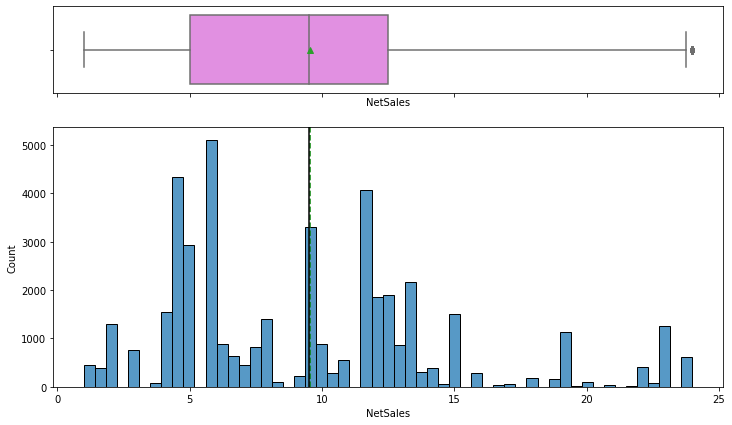

In [39]:
histogram_boxplot(df_foodandbev_nooutliers, "NetSales")

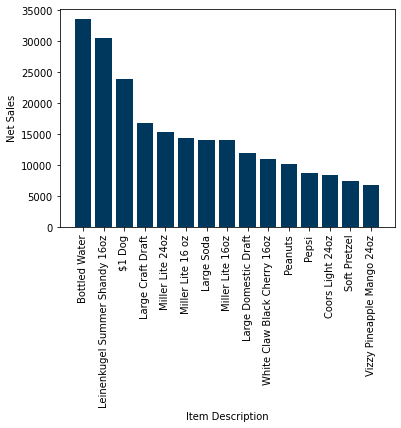

0.5400107872805552


In [40]:
# Get the top 10 product descriptions and net sales
top_products = top_products_locations_netsales['ItemDescription']
top_netsales = top_products_locations_netsales['NetSales']

# Create the bar chart
plt.bar(top_products, top_netsales, color=(0,56/255,93/255))

# Add labels for the x and y axes
plt.xlabel('Item Description')
plt.ylabel('Net Sales')

# Rotate the x-axis labels to make them easier to read
plt.xticks(rotation=90)

# Show the chart
plt.show()

print(top_netsales.sum()/(df_fandb["NetSales"].sum()))

In [41]:
df_beer = df_fandb[df_fandb['ItemGroupDescription'] == 'Beer Sales']
df_miller_leinenkugel = df_beer[df_beer['ItemDescription'].str.contains('Miller|Leinenkugel')]
total_net_sales_miller_leinenkugel = df_miller_leinenkugel['NetSales'].sum()
beer_sales = df_fandb[df_fandb['ItemGroupDescription'] == 'Beer Sales']
total_beer_sales = beer_sales['NetSales'].sum()
print(total_net_sales_miller_leinenkugel/total_beer_sales)

0.4304353209447259


**Observations**: This graph shows the top 15 selling items by net sales and plots the quantity sold for each of those products. One takeaway here is that the $1 dog promotion worked, in that vendors moved a ton of product. Additionally, beer sales, specifically Miller Lite, made up a vast majority of the net sales. Interestingly, the speciality Summer Shandy was a top performing beer. One extension would be to track this sort of beer throughout the season.

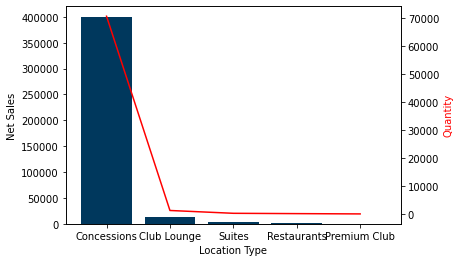

In [42]:
def plot_net_sales_by_location(dataframe):
    net_sales_by_location = dataframe.groupby('LocationType')['NetSales'].sum().reset_index().sort_values(by='NetSales', ascending=False)
    quantity_by_location = dataframe.groupby('LocationType')['UnitQuantity'].sum().reset_index().sort_values(by='UnitQuantity', ascending=False)
    fig, ax1 = plt.subplots()
    ax1.bar(net_sales_by_location['LocationType'], net_sales_by_location['NetSales'],color=(0,56/255,93/255))
    ax1.set_xlabel('Location Type')
    ax1.set_ylabel('Net Sales')
    plt.xticks(rotation=0)

    ax2 = ax1.twinx()
    ax2.plot(quantity_by_location['LocationType'], quantity_by_location['UnitQuantity'], 'r-')
    ax2.set_ylabel('Quantity', color='r')

    plt.show()

plot_net_sales_by_location(df_fandb)

**Observations:**This graph shows that Concessions, as a location type, dominates the Net Sales and Quantity. This confirms that most fans are purchasing items from these stands, this would track with the next graph with top performing areas.

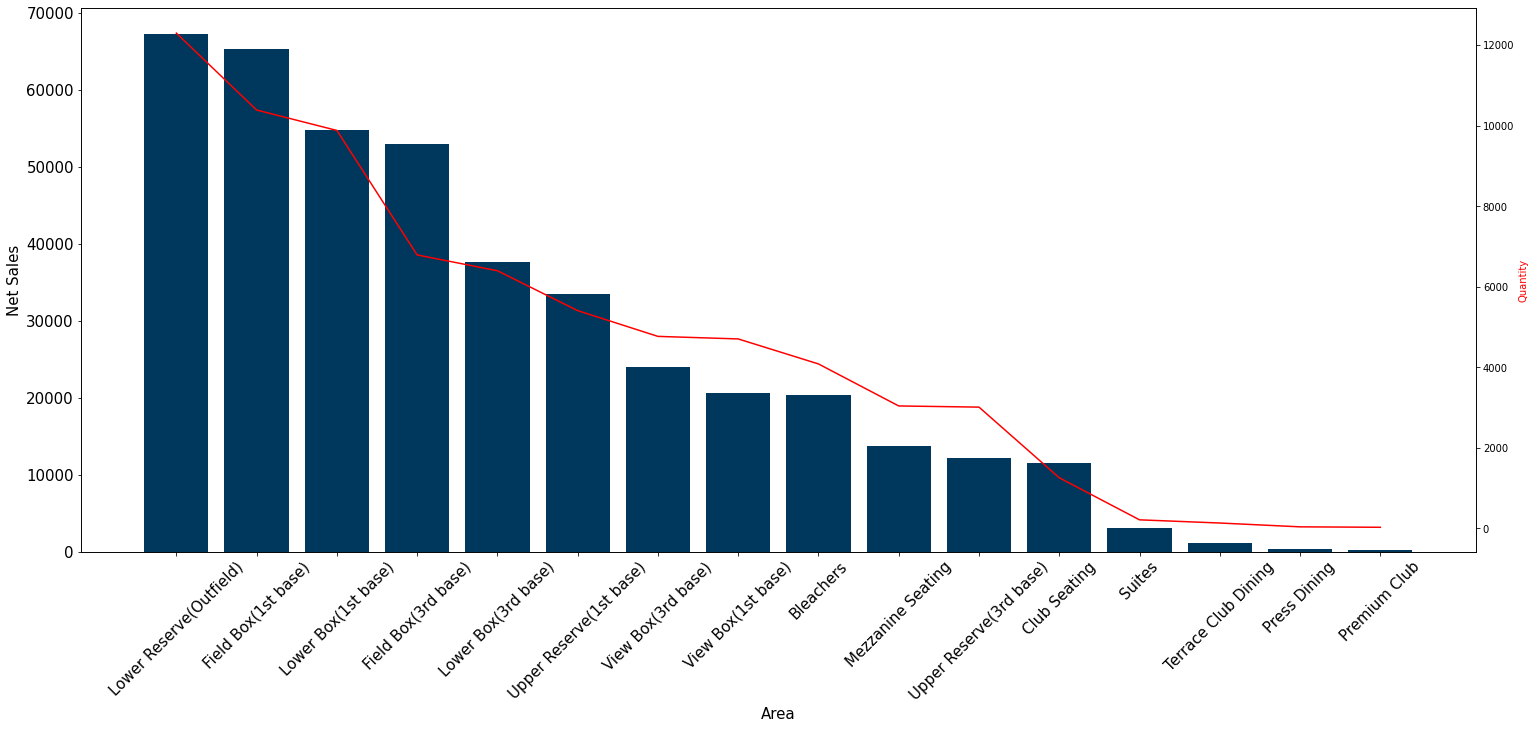

In [43]:
def plot_net_sales_by_area(dataframe):
    net_sales_by_location = dataframe.groupby('Area')['NetSales'].sum().reset_index().sort_values(by='NetSales', ascending=False)
    quantity_by_location = dataframe.groupby('Area')['UnitQuantity'].sum().reset_index().sort_values(by='UnitQuantity', ascending=False)
    fig, ax1 = plt.subplots(figsize=(25,10))
    ax1.bar(net_sales_by_location['Area'], net_sales_by_location['NetSales'],color=(0,56/255,93/255))
    ax1.set_xlabel('Area', fontsize=15)
    ax1.set_ylabel('Net Sales', fontsize=15)
    plt.xticks(rotation=45, fontsize=15)
    plt.yticks(rotation=0, fontsize=15)

    ax2 = ax1.twinx()
    ax2.plot(quantity_by_location['Area'], quantity_by_location['UnitQuantity'], 'r-')
    ax2.set_ylabel('Quantity', color='r')

    plt.show()

plot_net_sales_by_area(df_fandb)

**Observations:** The higher ticket price areas are driving revenue for and quantity. However, what seems like super premium seating like the Club Seating and Suites are obviously volume-limited; therefore, net sales would be lower from these areas. The revenue coming from these areas could be primarily driven from ticket prices.

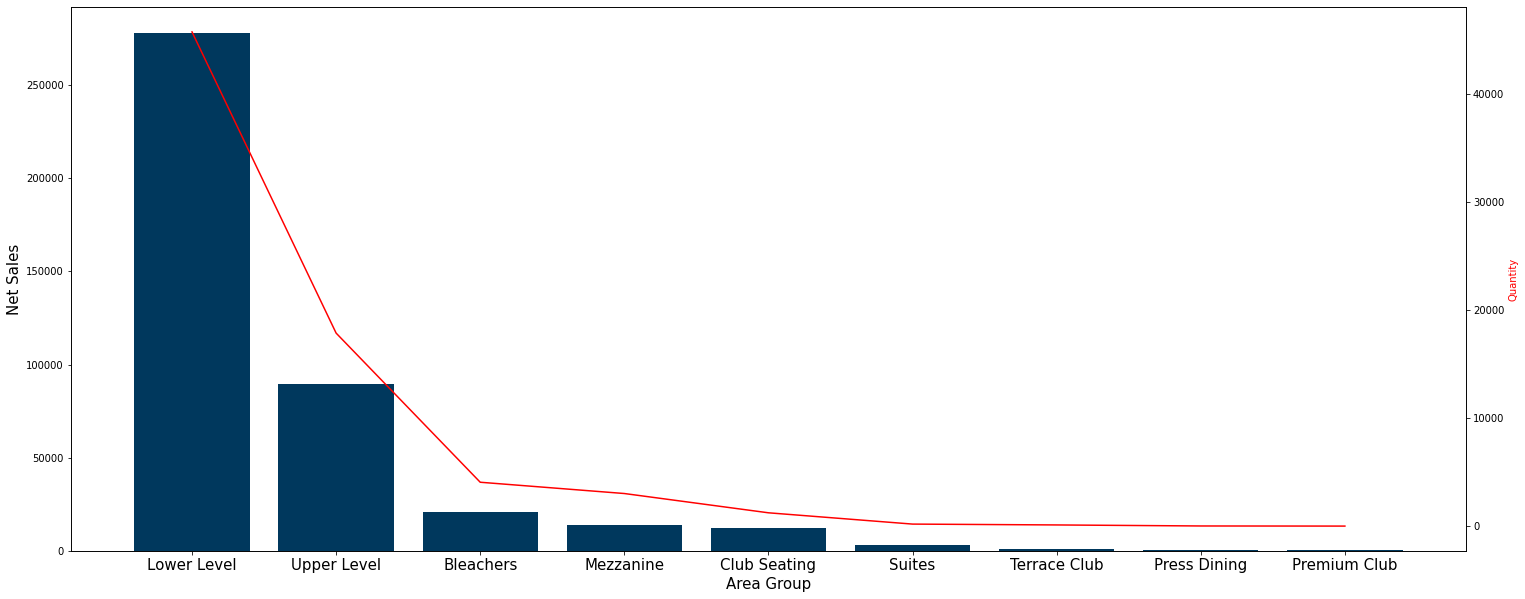

In [44]:
def plot_net_sales_by_areagroup(dataframe):
    net_sales_by_location = dataframe.groupby('AreaGroup')['NetSales'].sum().reset_index().sort_values(by='NetSales', ascending=False)
    quantity_by_location = dataframe.groupby('AreaGroup')['UnitQuantity'].sum().reset_index().sort_values(by='UnitQuantity', ascending=False)
    fig, ax1 = plt.subplots(figsize=(25,10))
    ax1.bar(net_sales_by_location['AreaGroup'], net_sales_by_location['NetSales'],color=(0,56/255,93/255))
    ax1.set_xlabel('Area Group',fontsize=15)
    ax1.set_ylabel('Net Sales',fontsize=15)
    plt.xticks(rotation=0,fontsize=15)

    ax2 = ax1.twinx()
    ax2.plot(quantity_by_location['AreaGroup'], quantity_by_location['UnitQuantity'], 'r-')
    ax2.set_ylabel('Quantity', color='r')

    plt.show()

plot_net_sales_by_areagroup(df_fandb)

In [45]:
df_fandb_lower_level = df_fandb[df_fandb["AreaGroup"] == "Lower Level"]
total_net_sales = df_fandb["NetSales"].sum()
lower_level_net_sales = df_fandb_lower_level["NetSales"].sum()
percentage_areagroup = (lower_level_net_sales / total_net_sales) * 100
print(percentage_areagroup)
print(df_fandb_lower_level["NetSales"].sum())
print(df_fandb["NetSales"].sum())

66.33640563993394
277957.5
419012.0


**Observations:** This graph confirms the observations from above. Lower Level seating is driving revenue and quantity. Once again, super premium seating make up less of the revenue and quantity. This could also be a virtue of eliminating outliers which primarily came from super premium seating.

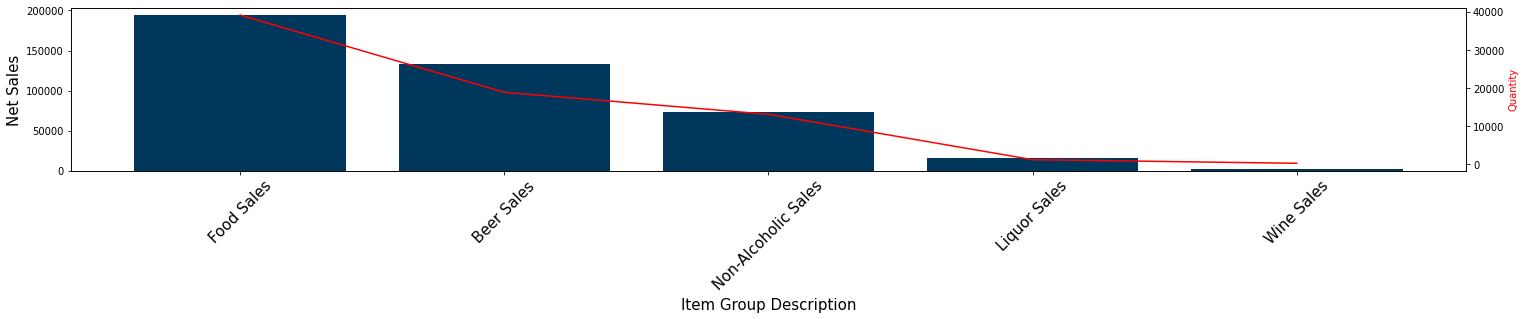

In [46]:
def plot_net_sales_by_itemgroupdescription(dataframe):
    net_sales_by_itemgroupdescription = dataframe.groupby('ItemGroupDescription')['NetSales'].sum().reset_index().sort_values(by='NetSales', ascending=False)
    quantity_by_itemgroupdescription = dataframe.groupby('ItemGroupDescription')['UnitQuantity'].sum().reset_index().sort_values(by='UnitQuantity', ascending=False)
    fig, ax1 = plt.subplots(figsize=(25,3))
    ax1.bar(net_sales_by_itemgroupdescription['ItemGroupDescription'], net_sales_by_itemgroupdescription['NetSales'],color=(0,56/255,93/255))
    ax1.set_xlabel('Item Group Description', fontsize=15)
    ax1.set_ylabel('Net Sales', fontsize=15)
    plt.xticks(rotation=45,fontsize=15)

    ax2 = ax1.twinx()
    ax2.plot(quantity_by_itemgroupdescription['ItemGroupDescription'], quantity_by_itemgroupdescription['UnitQuantity'], 'r-')
    ax2.set_ylabel('Quantity', color='r')

    plt.show()

plot_net_sales_by_itemgroupdescription(df_fandb)

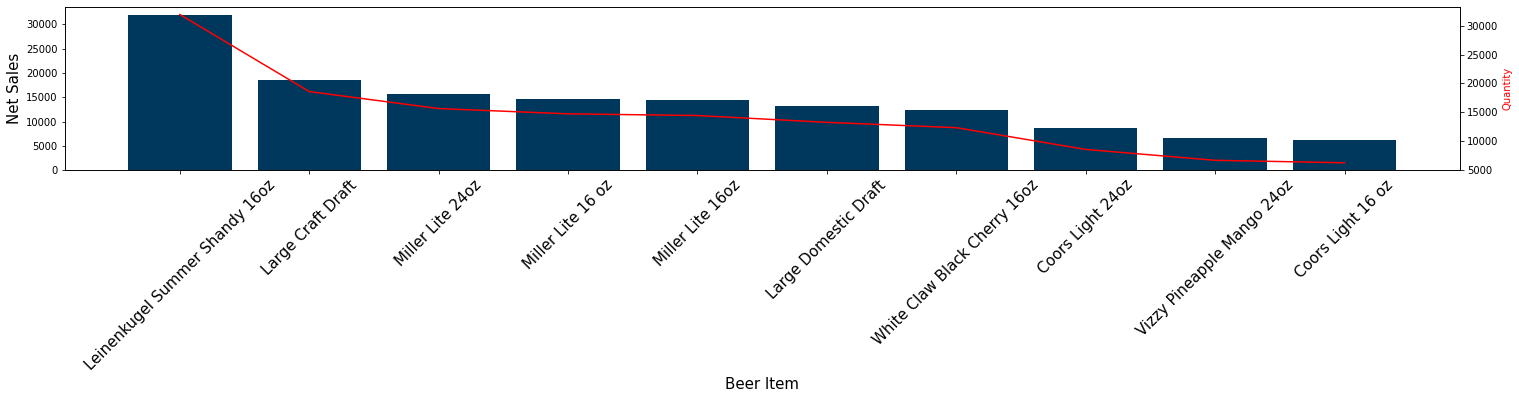

In [47]:
def plot_net_sales_top_10_beer(dataframe):
    beer_concessions = dataframe[dataframe['ItemGroupDescription'] == 'Beer Sales']
    net_sales_beer_concessions = beer_concessions.groupby('ItemDescription')['NetSales'].sum().reset_index().sort_values(by='NetSales', ascending=False).head(10)
    fig, ax1 = plt.subplots(figsize=(25,3))
    ax1.bar(net_sales_beer_concessions['ItemDescription'], net_sales_beer_concessions['NetSales'],color=(0,56/255,93/255))
    ax1.set_xlabel('Beer Item', fontsize=15)
    ax1.set_ylabel('Net Sales', fontsize=15)
    plt.xticks(rotation=45,fontsize=15)
    
    ax2 = ax1.twinx()
    ax2.plot(net_sales_beer_concessions['ItemDescription'], net_sales_beer_concessions['NetSales'], 'r-')
    ax2.set_ylabel('Quantity', color='r')
    
    plt.show()
plot_net_sales_top_10_beer(df_fandb)

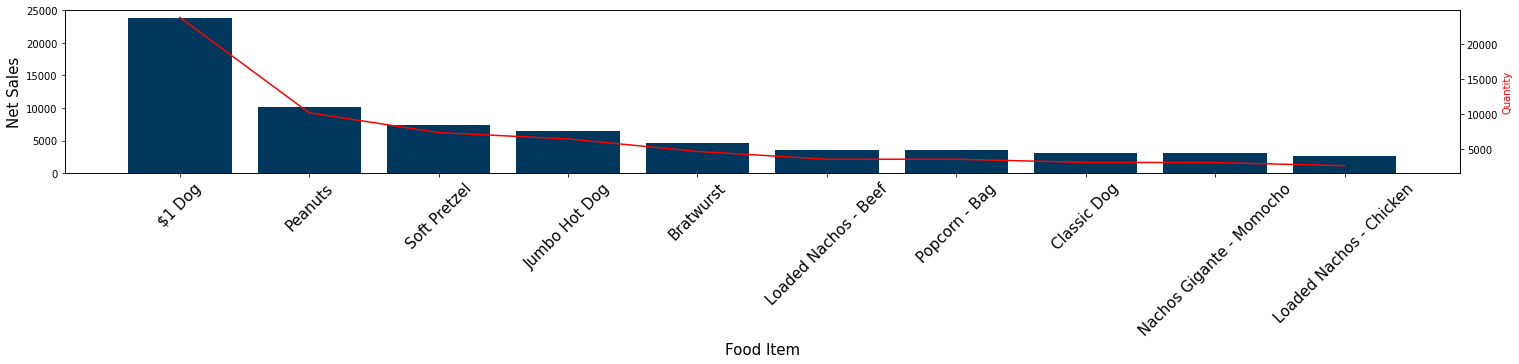

In [48]:
def plot_net_sales_top_10_food(dataframe):
    food_concessions = dataframe[dataframe['ItemGroupDescription'] == 'Food Sales']
    net_sales_food_concessions = food_concessions.groupby('ItemDescription')['NetSales'].sum().reset_index().sort_values(by='NetSales', ascending=False).head(10)
    fig, ax1 = plt.subplots(figsize=(25,3))
    ax1.bar(net_sales_food_concessions['ItemDescription'], net_sales_food_concessions['NetSales'],color=(0,56/255,93/255))
    ax1.set_xlabel('Food Item',fontsize=15)
    ax1.set_ylabel('Net Sales',fontsize=15)
    plt.xticks(rotation=45,fontsize=15)
    
    ax2 = ax1.twinx()
    ax2.plot(net_sales_food_concessions['ItemDescription'], net_sales_food_concessions['NetSales'], 'r-')
    ax2.set_ylabel('Quantity', color='r')
    
    plt.show()
plot_net_sales_top_10_food(df_fandb)

**Observations:** These graphs drill down on the most popular items by net sales in both food sales and beer sales.

### **2. Inventory/Quantity Overview**

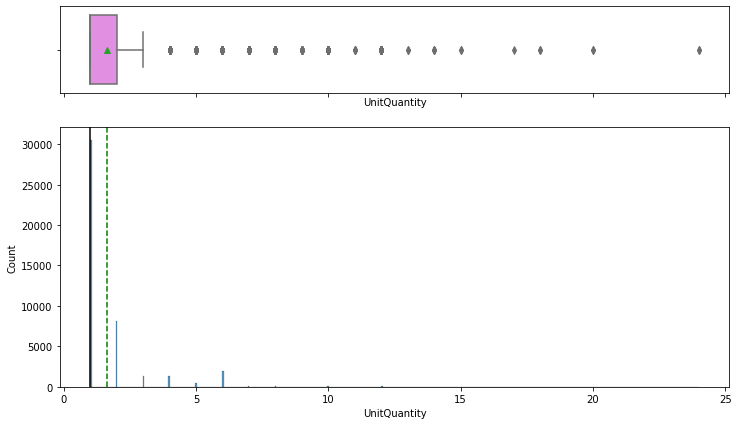

In [49]:
histogram_boxplot(df_foodandbev_nooutliers, "UnitQuantity")

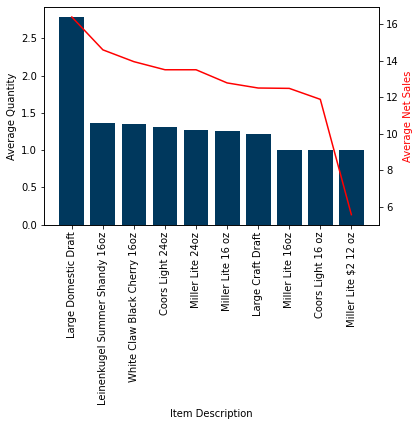

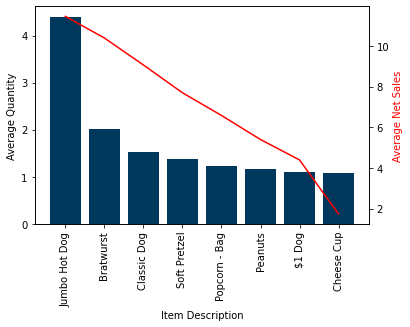

In [50]:
def plot_average_quantity_and_net_sales_for_top_items(dataframe, item_group_description, n=10, minimum_purchases=500):
    top_items = dataframe[dataframe['ItemGroupDescription'] == item_group_description].groupby('ItemDescription')['UnitQuantity'].sum().reset_index().sort_values(by='UnitQuantity', ascending=False).head(n)
    top_items = top_items[top_items['UnitQuantity'] >= minimum_purchases]

    avg_quantity_by_item = dataframe[dataframe['ItemDescription'].isin(top_items['ItemDescription'])].groupby('ItemDescription')['UnitQuantity'].mean().reset_index().sort_values(by='UnitQuantity', ascending=False)
    avg_net_sales_by_item = dataframe[dataframe['ItemDescription'].isin(top_items['ItemDescription'])].groupby('ItemDescription')['NetSales'].mean().reset_index().sort_values(by='NetSales', ascending=False)

    fig, ax1 = plt.subplots()
    ax1.bar(avg_quantity_by_item['ItemDescription'], avg_quantity_by_item['UnitQuantity'],color=(0,56/255,93/255))
    ax1.set_xlabel('Item Description')
    ax1.set_ylabel('Average Quantity')
    plt.xticks(rotation=90)

    ax2 = ax1.twinx()
    ax2.plot(avg_net_sales_by_item['ItemDescription'], avg_net_sales_by_item['NetSales'], 'r-')
    ax2.set_ylabel('Average Net Sales', color='r')

    plt.show()

plot_average_quantity_and_net_sales_for_top_items(df_fandb, "Beer Sales")
plot_average_quantity_and_net_sales_for_top_items(df_fandb, "Food Sales")


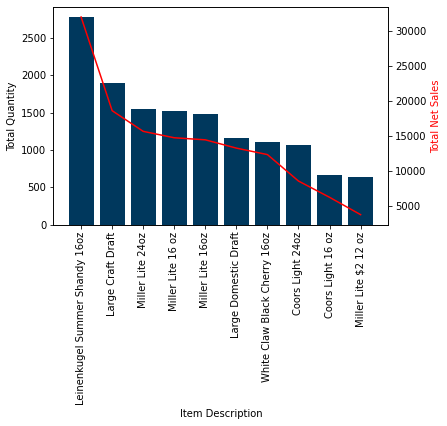

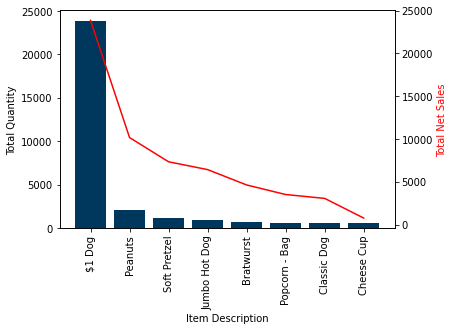

In [51]:
def plot_total_quantity_and_net_sales_for_top_items(dataframe, item_group_description, n=10, minimum_purchases=500):
    top_items = dataframe[dataframe['ItemGroupDescription'] == item_group_description].groupby('ItemDescription')['UnitQuantity'].sum().reset_index().sort_values(by='UnitQuantity', ascending=False).head(n)
    top_items = top_items[top_items['UnitQuantity'] >= minimum_purchases]

    total_quantity_by_item = dataframe[dataframe['ItemDescription'].isin(top_items['ItemDescription'])].groupby('ItemDescription')['UnitQuantity'].sum().reset_index().sort_values(by='UnitQuantity', ascending=False)
    total_net_sales_by_item = dataframe[dataframe['ItemDescription'].isin(top_items['ItemDescription'])].groupby('ItemDescription')['NetSales'].sum().reset_index().sort_values(by='NetSales', ascending=False)

    fig, ax1 = plt.subplots()
    ax1.bar(total_quantity_by_item['ItemDescription'],total_quantity_by_item['UnitQuantity'],color=(0,56/255,93/255))
    ax1.set_xlabel('Item Description')
    ax1.set_ylabel('Total Quantity')
    plt.xticks(rotation=90)

    ax2 = ax1.twinx()
    ax2.plot(total_net_sales_by_item['ItemDescription'], total_net_sales_by_item['NetSales'], 'r-')
    ax2.set_ylabel('Total Net Sales', color='r')

    plt.show()

plot_total_quantity_and_net_sales_for_top_items(df_fandb, "Beer Sales")
plot_total_quantity_and_net_sales_for_top_items(df_fandb, "Food Sales")

In [52]:
df_beer_quant = df_fandb[df_fandb['ItemGroupDescription'] == 'Beer Sales']
df_miller_leinenkugel_quant = df_beer_quant[df_beer_quant['ItemDescription'].str.contains('Miller|Leinenkugel')]
total_net_sales_miller_leinenkugel_quant = df_miller_leinenkugel_quant['UnitQuantity'].sum()
beer_sales_quant = df_fandb[df_fandb['ItemGroupDescription'] == 'Beer Sales']
total_beer_sales_quant = beer_sales['UnitQuantity'].sum()
print(total_net_sales_miller_leinenkugel_quant/total_beer_sales_quant)

0.5012996658002228


In [53]:
df_dollar_dog_quant = df_fandb[df_fandb['ItemDescription'] == "$1 Dog"]
df_totalfood = df_fandb[df_fandb['ItemGroupDescription'] == "Food Sales"]
print(df_dollar_dog_quant['NetSales'].sum()/df_totalfood['NetSales'].sum())

0.17829948408627588


In [54]:
df_dollar_dog_quant = df_fandb[df_fandb['ItemDescription'] == "$1 Dog"]
df_totalfood = df_fandb[df_fandb['ItemGroupDescription'] == "Food Sales"]
print(df_dollar_dog_quant['UnitQuantity'].sum()/df_totalfood['UnitQuantity'].sum())

0.609946305292764


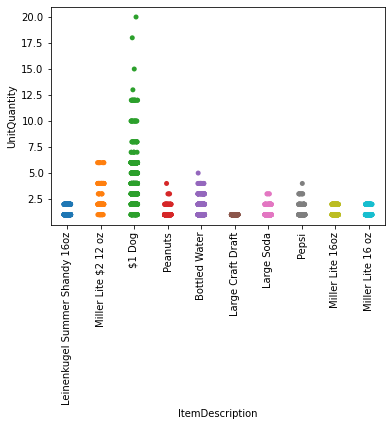

In [55]:
def plot_stripe_quantity_all(dataframe):
  top_10_products = dataframe.groupby('ItemDescription')['UnitQuantity'].sum().reset_index().sort_values(by='UnitQuantity', ascending=False).head(10)['ItemDescription'].tolist()
  random_4000 = dataframe[dataframe['ItemDescription'].isin(top_10_products)].sample(n=4000)
  sns.stripplot(x='ItemDescription', y='UnitQuantity', data=random_4000)
  plt.xticks(rotation=90)
  plt.show()

plot_stripe_quantity_all(df_fandb)


**Observations:** Unit Quatity purchasing is fairly centered around a range of 0-5 units purchased for the 10 most purchased items, across different item group descriptions. Interestingly, lower cost items like the bottled water, $1 dog and $2 dollar Miller Lite have a larger range than higher cost items. This could point to price elasticity with customers, since they are willing to spend more on lower cost items. Lets drill down on top performers in Beer and Food Sales. You can extend this visualization to show unit quantity distributions for each item description, the stripplot gives us a high-level view of this.

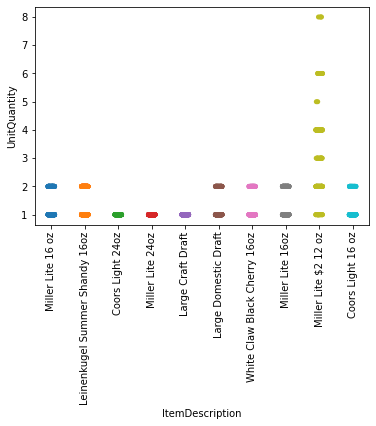

In [56]:
def plot_stripe_quantity_beer(dataframe):
    beer_sales = dataframe[dataframe['ItemGroupDescription'] == 'Beer Sales']
    top_10_products = beer_sales.groupby('ItemDescription')['UnitQuantity'].sum().reset_index().sort_values(by='UnitQuantity', ascending=False).head(10)['ItemDescription'].tolist()
    random_4000= beer_sales[beer_sales['ItemDescription'].isin(top_10_products)].sample(n=4000)
    sns.stripplot(x='ItemDescription', y='UnitQuantity', data=random_4000)
    plt.xticks(rotation=90)
    plt.show()

plot_stripe_quantity_beer(df_fandb)

**Observations:** For Beer Sales, the distribution of the top performing items from a quantity standpoint hover around 0-3 items purchased each time. Once again, the only exception is the lower cost product ($2 Miller Lite). 

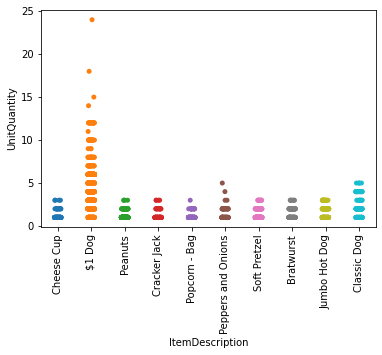

In [57]:
def plot_stripe_quantity_food(dataframe):
    food_sales = dataframe[dataframe['ItemGroupDescription'] == 'Food Sales']
    top_10_products = food_sales.groupby('ItemDescription')['UnitQuantity'].sum().reset_index().sort_values(by='UnitQuantity', ascending=False).head(10)['ItemDescription'].tolist()
    random_4000= food_sales[food_sales['ItemDescription'].isin(top_10_products)].sample(n=4000)
    sns.stripplot(x='ItemDescription', y='UnitQuantity', data=random_4000)
    plt.xticks(rotation=90)
    plt.show()

plot_stripe_quantity_food(df_fandb)

**Observations:** For Food Sales, the distribution of the top performing items from a quantity standpoint hover around 0-4 items purchased each time. Once again, the only exception is the lower cost product ($1 Dogs and Cracker Jacks).Lets explore the relationship betwen price and unit quantity distribution.

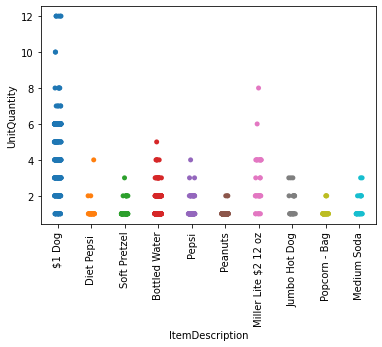

In [58]:
def plot_stripe_quantity_for_lowest_cost_products(dataframe):
    low_cost_products = dataframe[dataframe.groupby('ItemDescription').ItemDescription.transform('count') >= 500].groupby('ItemDescription')['UnitPrice'].min().reset_index().sort_values(by='UnitPrice', ascending=True).head(10)['ItemDescription'].tolist()
    random_1000 = dataframe[dataframe['ItemDescription'].isin(low_cost_products)].sample(n=1000)
    sns.stripplot(x='ItemDescription', y='UnitQuantity', data=random_1000)
    plt.xticks(rotation=90)
    plt.show()

plot_stripe_quantity_for_lowest_cost_products(df_fandb)

**Observations:** Visually, lower cost products have slightly larger distibutions; however, this would need further data analysis. But this could be consistent of customer behavior that are looking for more volume rather than higher ticket items.

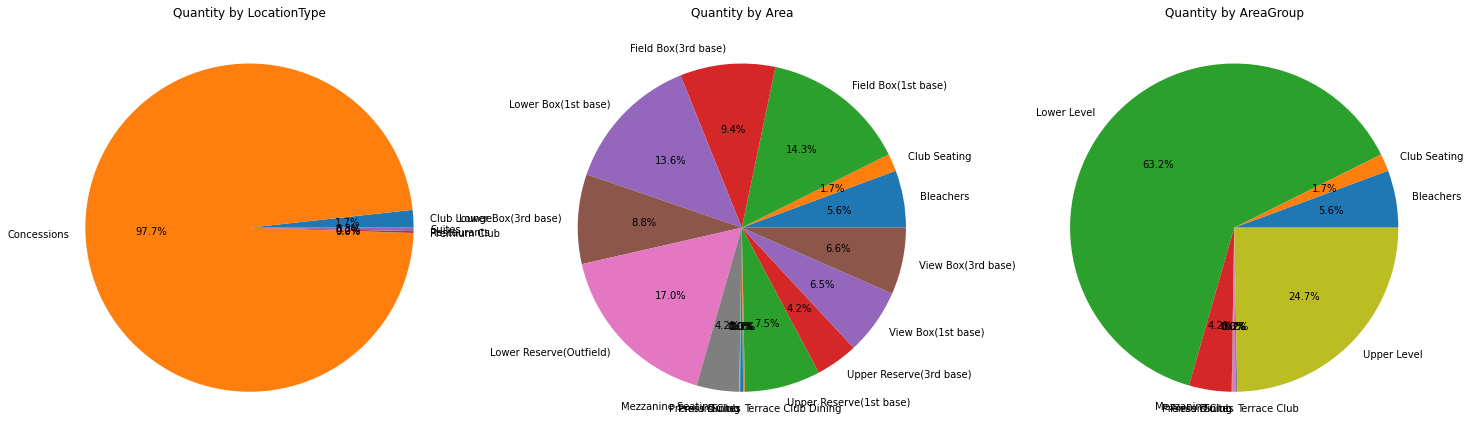

In [59]:
def plot_quantity_by_location_area_group_pie(dataframe):
    quantity_by_location = dataframe.groupby('LocationType')['UnitQuantity'].sum().reset_index()
    quantity_by_area = dataframe.groupby('Area')['UnitQuantity'].sum().reset_index()
    quantity_by_area_group = dataframe.groupby('AreaGroup')['UnitQuantity'].sum().reset_index()

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25, 25))
    ax1.pie(quantity_by_location['UnitQuantity'], labels=quantity_by_location['LocationType'], autopct='%1.1f%%')
    ax1.set_title('Quantity by LocationType')

    ax2.pie(quantity_by_area['UnitQuantity'], labels=quantity_by_area['Area'], autopct='%1.1f%%')
    ax2.set_title('Quantity by Area')

    ax3.pie(quantity_by_area_group['UnitQuantity'], labels=quantity_by_area_group['AreaGroup'], autopct='%1.1f%%')
    ax3.set_title('Quantity by AreaGroup')

    plt.show()

plot_quantity_by_location_area_group_pie(df_fandb)


**Observations:** The location analysis shows us the virtually the same information as the net sales analysis. Lower Level seating for Area Group and Concession by Location Type make up a lionshare of the volume.

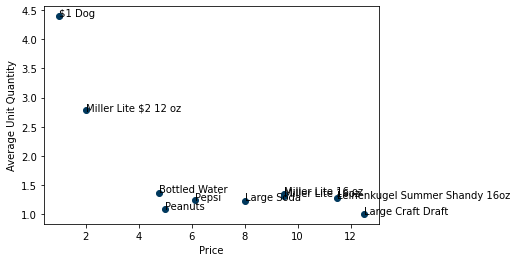

In [60]:
def scatter_plot_price_vs_unit_quantity(dataframe):
    top_10_items = dataframe.groupby('ItemDescription')['UnitQuantity'].sum().reset_index().sort_values(by='UnitQuantity', ascending=False).head(10)
    top_10_items_data = dataframe[dataframe['ItemDescription'].isin(top_10_items['ItemDescription'])]
    avg_unit_quantity = top_10_items_data.groupby('ItemDescription')['UnitQuantity'].mean().reset_index()
    avg_price = top_10_items_data.groupby('ItemDescription')['UnitPrice'].mean().reset_index()
    merged_data = pd.merge(avg_unit_quantity, avg_price, on='ItemDescription')
    fig, ax = plt.subplots()
    ax.scatter(merged_data['UnitPrice'], merged_data['UnitQuantity'], color=(0,56/255,93/255))
    ax.set_xlabel('Price')
    ax.set_ylabel('Average Unit Quantity')
    for i, txt in enumerate(merged_data['ItemDescription']):
        ax.annotate(txt, (merged_data['UnitPrice'][i], merged_data['UnitQuantity'][i]))
    plt.show()

scatter_plot_price_vs_unit_quantity(df_fandb)


**Observations:** This shows us how price varies with the average amount a customer purchases per visit. Clearly, price has a negative relationship between average unit quantity with price. We will explore this later through a simple correlation heat map; moreover, we will extend this analysis to all products.

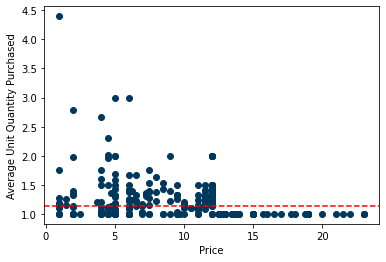

The correlation between unit price and average unit quantity purchased for each item is: -0.29115937904975464


In [61]:
def plot_price_vs_avg_unit_quantity(dataframe):
    items_grouped = dataframe.groupby('ItemID').mean()
    items_grouped = items_grouped[['UnitPrice', 'UnitQuantity']]
    items_grouped['AvgUnitQuantity'] = items_grouped['UnitQuantity']
    fig, ax = plt.subplots()
    ax.scatter(items_grouped['UnitPrice'], items_grouped['AvgUnitQuantity'], color=(0,56/255,93/255))
    ax.set_xlabel('Price')
    ax.set_ylabel('Average Unit Quantity Purchased')
    median = items_grouped.median()
    ax.axhline(median['AvgUnitQuantity'], color='red', linestyle='--')
    plt.show()
    return np.corrcoef(items_grouped['UnitPrice'], items_grouped['AvgUnitQuantity'])[0][1]

correlation = plot_price_vs_avg_unit_quantity(df_fandb)
print("The correlation between unit price and average unit quantity purchased for each item is:", correlation)



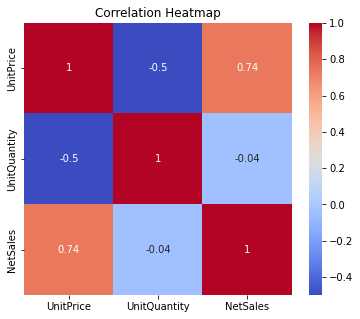

In [62]:
def plot_correlation_heatmap(dataframe):
    numerical_cols = ['UnitPrice', 'UnitQuantity', 'NetSales']
    corr = dataframe[numerical_cols].corr()

    fig, ax = plt.subplots(figsize=(6, 5))
    sns.heatmap(corr, annot=True, cmap='coolwarm', ax=ax)
    ax.set_title('Correlation Heatmap')
    plt.show()

plot_correlation_heatmap(df_fandb)



**Observations:** These last two analyses show that customers could be price elastic when faced with options throughout the ballpark. It would be more indictiative if there were more data points/games to study or extend the analysis.

### **3. Time Series Analysis**

In [63]:
# Filter the data based on SaleTime being between 18:00 and 22:00
mask = (df_fandb["SaleTime"].dt.hour >= 18) & (df_fandb["SaleTime"].dt.hour < 22)
df_timeseries = df_fandb[mask]

In [64]:
bins = pd.cut(df_timeseries ['SaleTime'], bins=5, labels=False, retbins=True)[1]
for i in range(5):
    print(f"Bucket {i}: {pd.to_datetime(bins[i]).time()} - {pd.to_datetime(bins[i+1]).time()}")

df_timeseries['SaleTime_bucket'] = pd.cut(df_timeseries['SaleTime'], bins=bins, labels=False)


Bucket 0: 17:59:45.603000 - 18:47:59.400000
Bucket 1: 18:47:59.400000 - 19:35:58.800000
Bucket 2: 19:35:58.800000 - 20:23:58.200000
Bucket 3: 20:23:58.200000 - 21:11:57.600000
Bucket 4: 21:11:57.600000 - 21:59:57


<ipython-input-64-a441e70b79c4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_timeseries['SaleTime_bucket'] = pd.cut(df_timeseries['SaleTime'], bins=bins, labels=False)


In [65]:
df_timeseries.head()

,EventID,Start,Season,GameNumber,OpponentAbbr,OpponentName,ConcessionsInParkAttendance,SaleID,SaleDate,SaleTime,IsAdvanceSale,SaleItemID,UnitPrice,UnitQuantity,TaxInclusive,NetSales,Discount,GrossRevenue,RegisterDescription,LocationDescription,LocationType,ItemID,ItemDescription,ItemGroupDescription,Area,AreaGroupID,AreaGroup,CustID,SaleTime_bucket
0,9636,10:00.0,RS,29,BOS,Boston Red Sox,24910,23502764,6/24/2022 20:45,1900-01-01 20:45:42,NaN,122548141,4.5,2,0,9.0,0,9.0,C149F Ballpark Classic Grill (Mobile),C149F Ballpark Classic Grill (Mobile),Concessions,144856,Classic Dog - Mobile,Food Sales,Field Box(1st base),3,Lower Level,1901720.0,3
3,9636,10:00.0,RS,29,BOS,Boston Red Sox,24910,23503190,6/24/2022 21:08,1900-01-01 21:08:10,NaN,122558468,11.5,1,0,11.5,0,11.5,CP171F Hometown Sausages (Mobile),CP171F Hometown Sausages (Mobile),Concessions,144501,Platform Sun Surfer 16oz,Beer Sales,Lower Box(3rd base),3,Lower Level,1155086.0,3
4,9636,10:00.0,RS,29,BOS,Boston Red Sox,24910,23501645,6/24/2022 20:29,1900-01-01 20:29:39,NaN,122551734,11.5,1,0,11.5,0,11.5,CP171F Hometown Sausages (Mobile),CP171F Hometown Sausages (Mobile),Concessions,144501,Platform Sun Surfer 16oz,Beer Sales,Lower Box(3rd base),3,Lower Level,1155086.0,3
5,9636,10:00.0,RS,29,BOS,Boston Red Sox,24910,23487723,6/24/2022 18:45,1900-01-01 18:45:45,NaN,122531618,6.0,2,0,12.0,0,12.0,C149F Ballpark Classic Grill (Mobile),C149F Ballpark Classic Grill (Mobile),Concessions,144427,Popcorn - Bag,Food Sales,Field Box(1st base),3,Lower Level,1155086.0,0
6,9636,10:00.0,RS,29,BOS,Boston Red Sox,24910,23502293,6/24/2022 20:08,1900-01-01 20:08:20,NaN,122559888,9.5,2,0,19.0,0,19.0,C138F Miller Bar (Mobile),C138F Miller Bar (Mobile),Concessions,144366,Miller Lite 16 oz,Beer Sales,Field Box(1st base),3,Lower Level,1544762.0,2


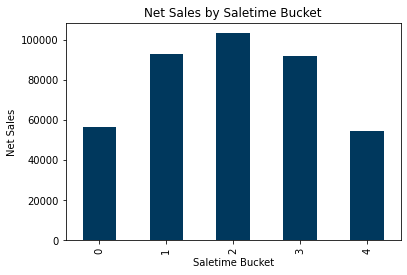

In [66]:
grouped = df_timeseries.groupby('SaleTime_bucket')['NetSales'].sum()
grouped.plot(kind='bar', x='SaleTime_bucket', y='NetSales', color=(0,56/255,93/255))
plt.title('Net Sales by Saletime Bucket')
plt.xlabel('Saletime Bucket')
plt.ylabel('Net Sales')
plt.show()

**Observations:** Most of the net sales occur during the 2nd and 3rd bucket or from ~7:35pm - ~9:12pm. This represents early to mid-late game. We will explore this further as the analysis continues.

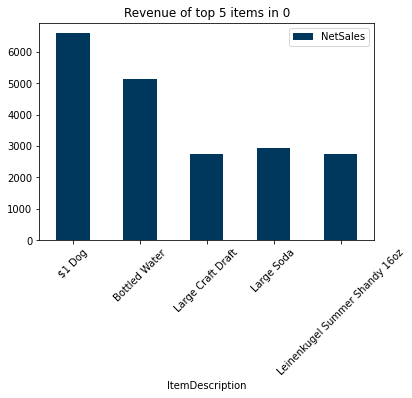

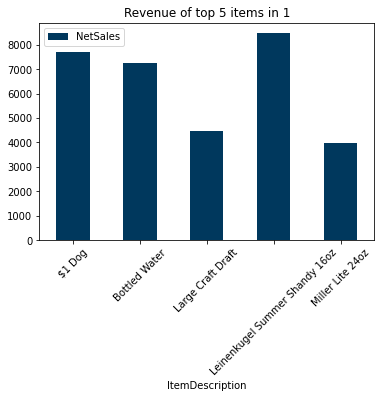

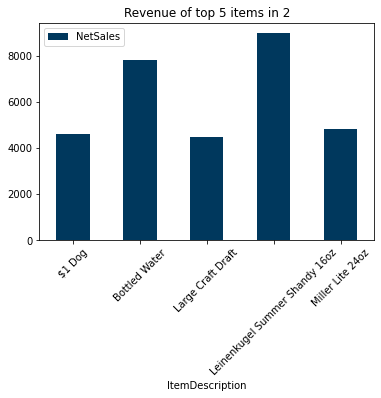

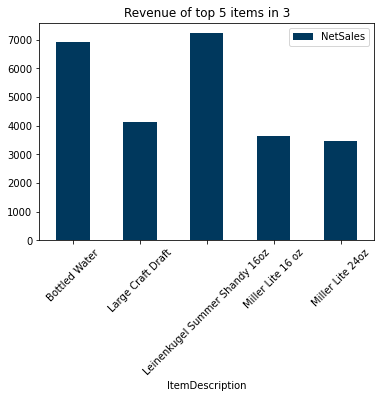

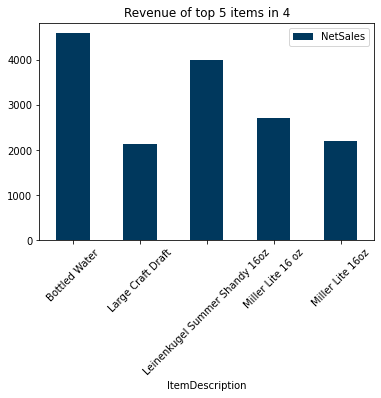

In [67]:
df_grouped = df_timeseries.groupby(['SaleTime_bucket', 'ItemDescription'])['NetSales'].sum().reset_index()

# find the top item descriptions in each bucket
n = 5 
top_items = {}
for bucket, bucket_df in df_grouped.groupby('SaleTime_bucket'):
    top_items[bucket] = list(bucket_df.nlargest(n, 'NetSales')['ItemDescription'])
    
# plot the revenue of each top item description within each bucket
for bucket, item_descs in top_items.items():
    bucket_df = df_grouped[df_grouped['SaleTime_bucket'] == bucket]
    bucket_df = bucket_df[bucket_df['ItemDescription'].isin(item_descs)]
    bucket_df.set_index('ItemDescription', inplace=True)
    bucket_df.plot(kind='bar', y='NetSales', color=(0,56/255,93/255), title=f"Revenue of top {5} items in {bucket}")
    plt.xticks(rotation=45)
    plt.show()
    


**Observations:** These graphs show that while there are minor differences as the game goes on, the top performing products generally maintain high sales.

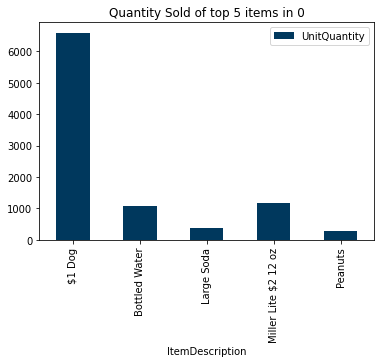

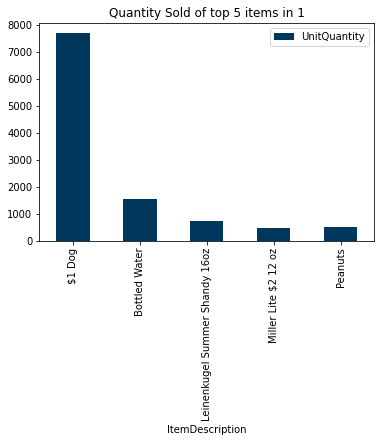

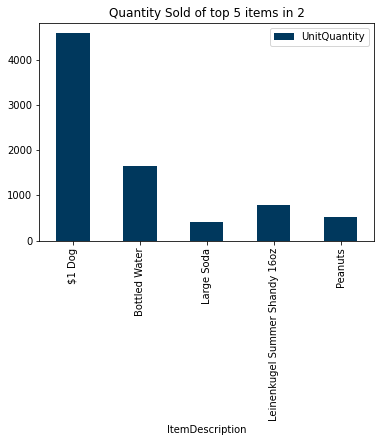

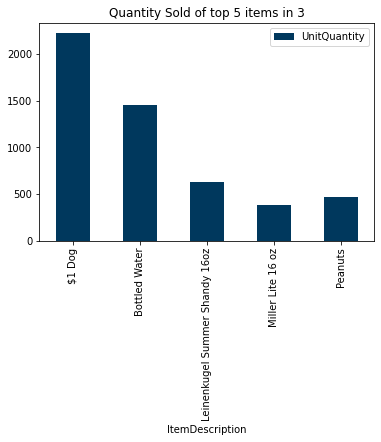

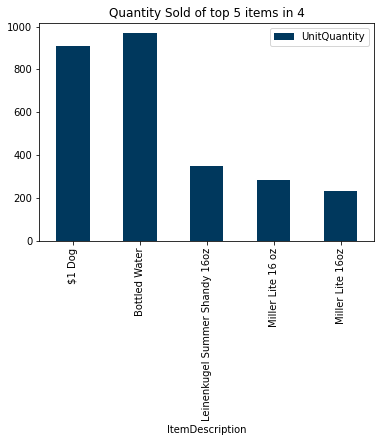

In [68]:
df_grouped = df_timeseries.groupby(['SaleTime_bucket', 'ItemDescription'])['UnitQuantity'].sum().reset_index()

# find the top item descriptions in each bucket
n = 5 
top_items = {}
for bucket, bucket_df in df_grouped.groupby('SaleTime_bucket'):
    top_items[bucket] = list(bucket_df.nlargest(n, 'UnitQuantity')['ItemDescription'])
    
# plot the revenue of each top item description within each bucket
for bucket, item_descs in top_items.items():
    bucket_df = df_grouped[df_grouped['SaleTime_bucket'] == bucket]
    bucket_df = bucket_df[bucket_df['ItemDescription'].isin(item_descs)]
    bucket_df.set_index('ItemDescription', inplace=True)
    bucket_df.plot(kind='bar', y='UnitQuantity', color=(0,56/255,93/255), title=f"Quantity Sold of top {5} items in {bucket}")
    plt.show()

**Observations:** These graphs show that while there are minor differences as the game goes on, the top performing products generally maintain high volume as well. This aligns with what we observe with the net sales graphs.

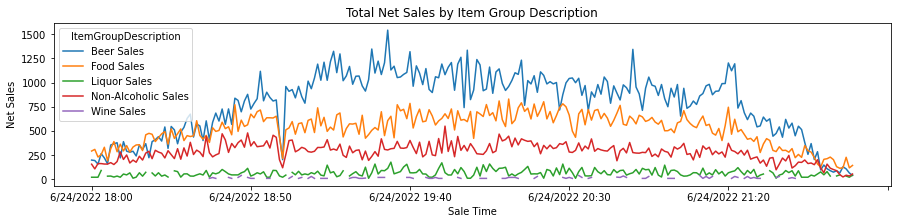

In [69]:
#Total Net Sales by Item Group Description
df_timeseries.groupby(['SaleDate', 'ItemGroupDescription'])['NetSales'].sum().unstack().plot(kind='line', figsize=(15,3))
plt.xlabel('Sale Time')
plt.ylabel('Net Sales')
plt.title('Total Net Sales by Item Group Description')
plt.show()

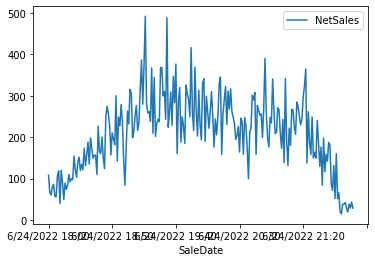

In [70]:
# Indexing the price of Miller as the game continues
df_miller = df_timeseries[df_timeseries['ItemDescription'].str.contains('Miller')]
df_miller_grouped = df_miller.groupby(['SaleDate'])['NetSales'].sum().reset_index()
df_miller_grouped.plot(x='SaleDate', y='NetSales', kind='line')


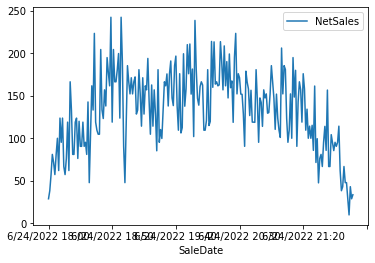

In [71]:
# Indexing the net sales of bottled water as the game continues
df_bw = df_timeseries[df_timeseries['ItemDescription'].str.contains('Bottled Water')]
df_bw_grouped = df_bw.groupby(['SaleDate'])['NetSales'].sum().reset_index()
df_bw_grouped.plot(x='SaleDate', y='NetSales', kind='line')


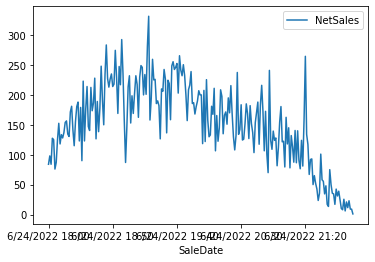

In [72]:
# Indexing the net sales of Hot Dogs as the game continues
df_dog = df_timeseries[df_timeseries['ItemDescription'].str.contains('Dog')]
df_dog_grouped = df_dog.groupby(['SaleDate'])['NetSales'].sum().reset_index()
df_dog_grouped.plot(x='SaleDate', y='NetSales', kind='line')


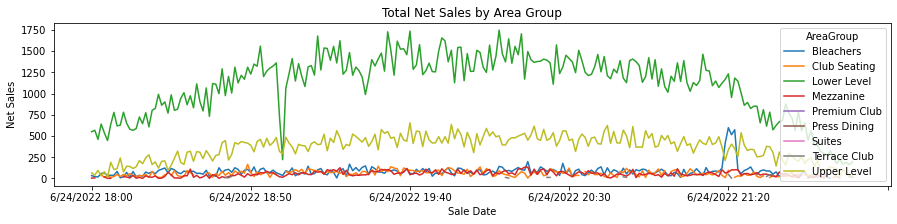

In [73]:
#Total Net Sales by Item Group Description
df_timeseries.groupby(['SaleDate', 'AreaGroup'])['NetSales'].sum().unstack().plot(kind='line', figsize=(15,3))
plt.xlabel('Sale Date')
plt.ylabel('Net Sales')
plt.title('Total Net Sales by Area Group')
plt.show()

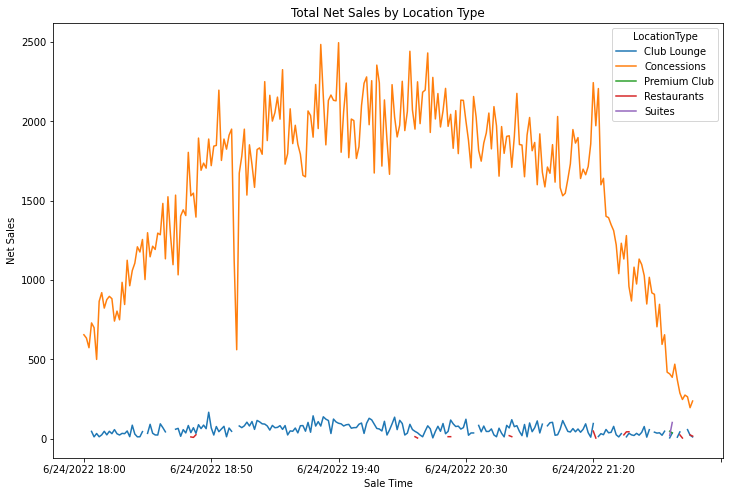

In [74]:
#Total Net Sales by LocationType
df_timeseries.groupby(['SaleDate', 'LocationType'])['NetSales'].sum().unstack().plot(kind='line', figsize=(12,8))
plt.xlabel('Sale Time')
plt.ylabel('Net Sales')
plt.title('Total Net Sales by Location Type')
plt.show()

**Observations:** The lineplots all reflect the initial bucket bar graph. The middle of the game represents the largest portion of sales. An interesting extension of this visualization technique is understanding the drop in Lower-Level Concessions during the beginning of the game. You can also see this across all ItemGroupDescription catergories.

### **4. Highest potential items to move**

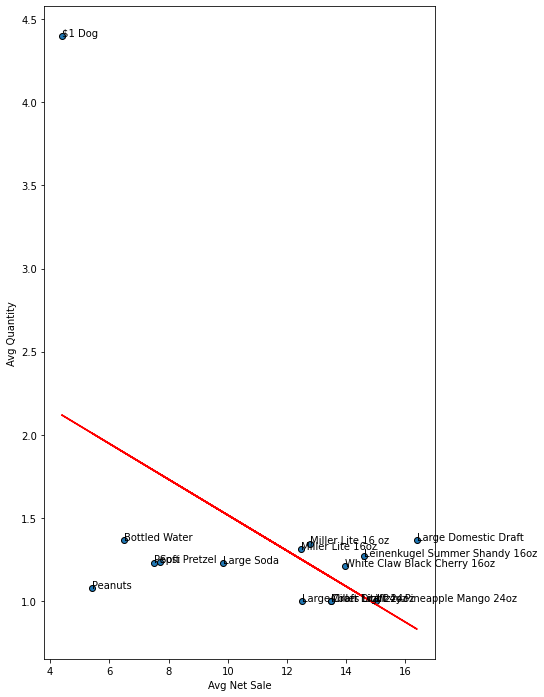

In [75]:
def calculate_average_netsale_quantity(dataframe, item_descriptions):
    avg_netsale_quantity = []
    for item in item_descriptions:
        item_avg_netsale = dataframe[dataframe['ItemDescription'] == item].groupby('ItemDescription')['NetSales'].mean().values[0]
        item_avg_quantity = dataframe[dataframe['ItemDescription'] == item].groupby('ItemDescription')['UnitQuantity'].mean().values[0]
        avg_netsale_quantity.append([item, item_avg_netsale, item_avg_quantity])
    return avg_netsale_quantity

def plot_average_netsale_quantity(dataframe, item_descriptions):
    avg_netsale_quantity = calculate_average_netsale_quantity(dataframe, item_descriptions)
    df = pd.DataFrame(avg_netsale_quantity, columns=['Item', 'Avg Net Sale', 'Avg Quantity'])
    
    plt.figure(figsize=(7, 12))
    plt.scatter(df['Avg Net Sale'], df['Avg Quantity'], edgecolors='black')
    for i, txt in enumerate(df['Item']):
        plt.annotate(txt, (df['Avg Net Sale'][i], df['Avg Quantity'][i]))
    plt.xlabel("Avg Net Sale")
    plt.ylabel("Avg Quantity")

    x = df['Avg Net Sale']
    y = df['Avg Quantity']
    fit = np.polyfit(x, y, deg=1)
    plt.plot(x, fit[0] * x + fit[1], color='red')

    plt.show()

top_25_item_descriptions = df_fandb.groupby("ItemDescription").agg({"NetSales": "sum"}).sort_values("NetSales", ascending=False).head(15).reset_index()["ItemDescription"].tolist()
plot_average_netsale_quantity(df_fandb, top_25_item_descriptions)



**Observations:** This is an extension of the frontier analysis started in 2.b.ii, the comparison of the data points and the median line of all products reveals potential pricing inefficiences. Since we only have control over pricing, this could be the flex variable to get these data points closer to the median. A further extension of this analysis would be to see exactly how much quantity would decrease/increase in response to a price increase/decrease. For the analysis at hand, we will take staples like bottled water and administer a modest price increase to see what could happen to overall net sales.

In [76]:
def calculate_new_netsales_after_price_increase(dataframe, item_descriptions, price_increase):
    total_increase = 0
    for item_description in item_descriptions:
        old_netsales = dataframe[dataframe['ItemDescription'] == item_description]['NetSales'].sum()
        new_quantity = dataframe[dataframe['ItemDescription'] == item_description]['UnitQuantity'].sum()
        new_netsales = (dataframe[dataframe['ItemDescription'] == item_description]['UnitPrice'].iloc[0] + price_increase) * new_quantity
        total_increase += new_netsales - old_netsales
    return total_increase

price_increase = 0.5
item_descriptions = ["Bottled Water", 'Peanuts', 'Diet Pepsi', 'Large Soda']

print("Total Net Sales Increase: ${:.2f}".format(calculate_new_netsales_after_price_increase(df_fandb, item_descriptions, price_increase)))


Total Net Sales Increase: $4335.50


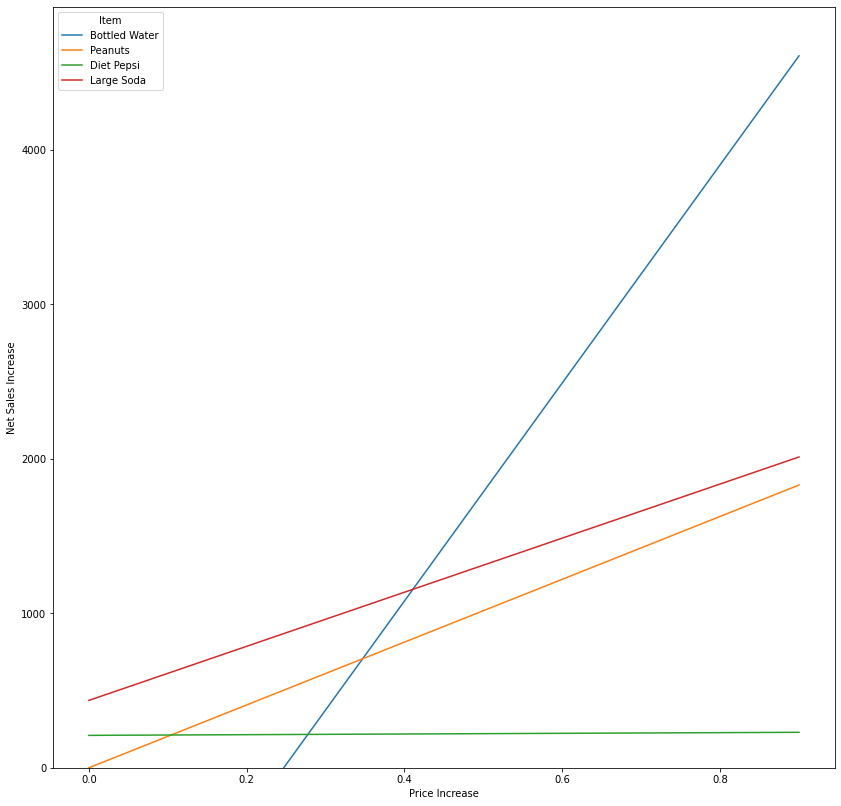

In [77]:
def calculate_new_netsales_after_price_increase(dataframe, item_description, price_increase):
    old_netsales = dataframe[dataframe['ItemDescription'] == item_description]['NetSales'].sum()
    new_quantity = dataframe[dataframe['ItemDescription'] == item_description]['UnitQuantity'].sum()
    new_netsales = (dataframe[dataframe['ItemDescription'] == item_description]['UnitPrice'].iloc[0] + price_increase) * new_quantity
    return new_netsales - old_netsales

def plot_new_netsales_after_price_increase(dataframe, item_descriptions, price_increases):
    net_sales_increases = []
    for item_description in item_descriptions:
        for price_increase in price_increases:
            net_sales_increases.append([item_description, price_increase, calculate_new_netsales_after_price_increase(dataframe, item_description, price_increase)])
    df = pd.DataFrame(net_sales_increases, columns=['Item', 'Price Increase', 'Net Sales Increase'])
    
    plt.figure(figsize=(14, 14))
    sns.lineplot(x='Price Increase', y='Net Sales Increase', hue='Item', data=df)
    plt.xlabel("Price Increase")
    plt.ylabel("Net Sales Increase")
    plt.ylim(0, None)
    plt.show()

item_descriptions = ["Bottled Water", 'Peanuts', 'Diet Pepsi', 'Large Soda']
price_increases = [0.1 * i for i in range(10)]
plot_new_netsales_after_price_increase(df_fandb, item_descriptions, price_increases)


**Observations:** After seeing a modest increase in prices, most result in net sales increases. 